<hr>
<font size = 6>ST1511 AIML CA2 Assignment (Time-Series) </font>
<hr>
<font size = 3>
Name: Lee Hong Yi<br>
Adm. No: p2223010<br>
Class: DAAA/FT/2A/05
</font>

__Objective:__ <br>
To use the given dataset to train timeseries models, and forecast the consumption of Gas, Electricity, and Water into the future.

__Background Information:__<br>
Water, gas, and electricity are essential resources that are used for a variety of purposes. The global consumption of these resources is increasing, and it is projected to continue to increase in the coming years. By being able to be ahead of the curve, and predict how the consumption of such resources will change over the years, the government and related utility companies can see how to create more buffer to give us resource security.

__Additional Information:__ <br>
-nil-

__Output Variable:__ <br>
Future consumption of water, gas and electricity.

In [3]:
# importing base modules
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# importing relevant modules from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#extra libraries
import itertools
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit


#ignoring redundant warnings
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)     
simplefilter(action='ignore', category=FutureWarning)

sns.set_theme();
sns.set(font = "DejaVu Sans")

<hr>
<font size = 5>Importing the data and manipulating it</font>
<hr>

In [4]:
data = pd.read_csv("./Energy Consumption Dataset.csv")
display(data)   

DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
0     1/1/1990                    18.0                          725.1   
1     1/2/1990                    15.8                          706.7   
2     1/3/1990                    17.3                          624.5   
3     1/4/1990                    18.9                          574.7   
4     1/5/1990                    22.0                          553.2   
..         ...                     ...                            ...   
392   1/9/2022                    27.7                          986.2   
393  1/10/2022                    31.8                          936.1   
394  1/11/2022                    31.0                          973.4   
395  1/12/2022                    32.4                         1147.2   
396   1/1/2023                    31.3                         1294.0   

     Water Consumption (tons)  
0                       548.8  
1                       640.7  
2                       511.1  
3                       515.3  
4                       488.4  
..                        ...  
392                     513.3  
393                     373.1  
394                     343.9  
395                     348.3  
396                     260.2  

[397 rows x 4 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           397 non-null    object 
 1   Gas Consumption (tons)         397 non-null    float64
 2   Electricity Consumption (MWh)  397 non-null    float64
 3   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB


In [6]:
data.describe().T

count        mean         std    min    25%  \
Gas Consumption (tons)         397.0   23.785139    4.903452   11.6   20.2   
Electricity Consumption (MWh)  397.0  888.472544  153.877594  553.2  771.1   
Water Consumption (tons)       397.0  484.953652  133.908863   44.4  384.4   

                                 50%     75%     max  
Gas Consumption (tons)          23.5    27.9    46.0  
Electricity Consumption (MWh)  897.8  1005.2  1294.0  
Water Consumption (tons)       487.4   580.2   811.0

In [7]:
data["DATE"] = pd.to_datetime(data["DATE"], format = "%d/%m/%Y")
data = data.set_index("DATE")

display(data)

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   
...                            ...                            ...   
2022-09-01                    27.7                          986.2   
2022-10-01                    31.8                          936.1   
2022-11-01                    31.0                          973.4   
2022-12-01                    32.4                         1147.2   
2023-01-01                    31.3                         1294.0   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4  
...                              ...  
2022-09-01                     513.3  
2022-10-01                     373.1  
2022-11-01                     343.9  
2022-12-01                     348.3  
2023-01-01                     260.2  

[397 rows x 3 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1990-01-01 to 2023-01-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB


In [9]:
d_col = ["Gas Consumption (tons)", "Electricity Consumption (MWh)", "Water Consumption (tons)"]

<hr>
<font size = 5>Exploratory Data Analysis (EDA)</font>
<hr>

We shall start the time-series analysis by performing EDA, to allow us to get a insight into the data given. This will allow us to have a better understanding of the data, and allow for better analysis to be mdae.

In [10]:
eda_data = data.copy()

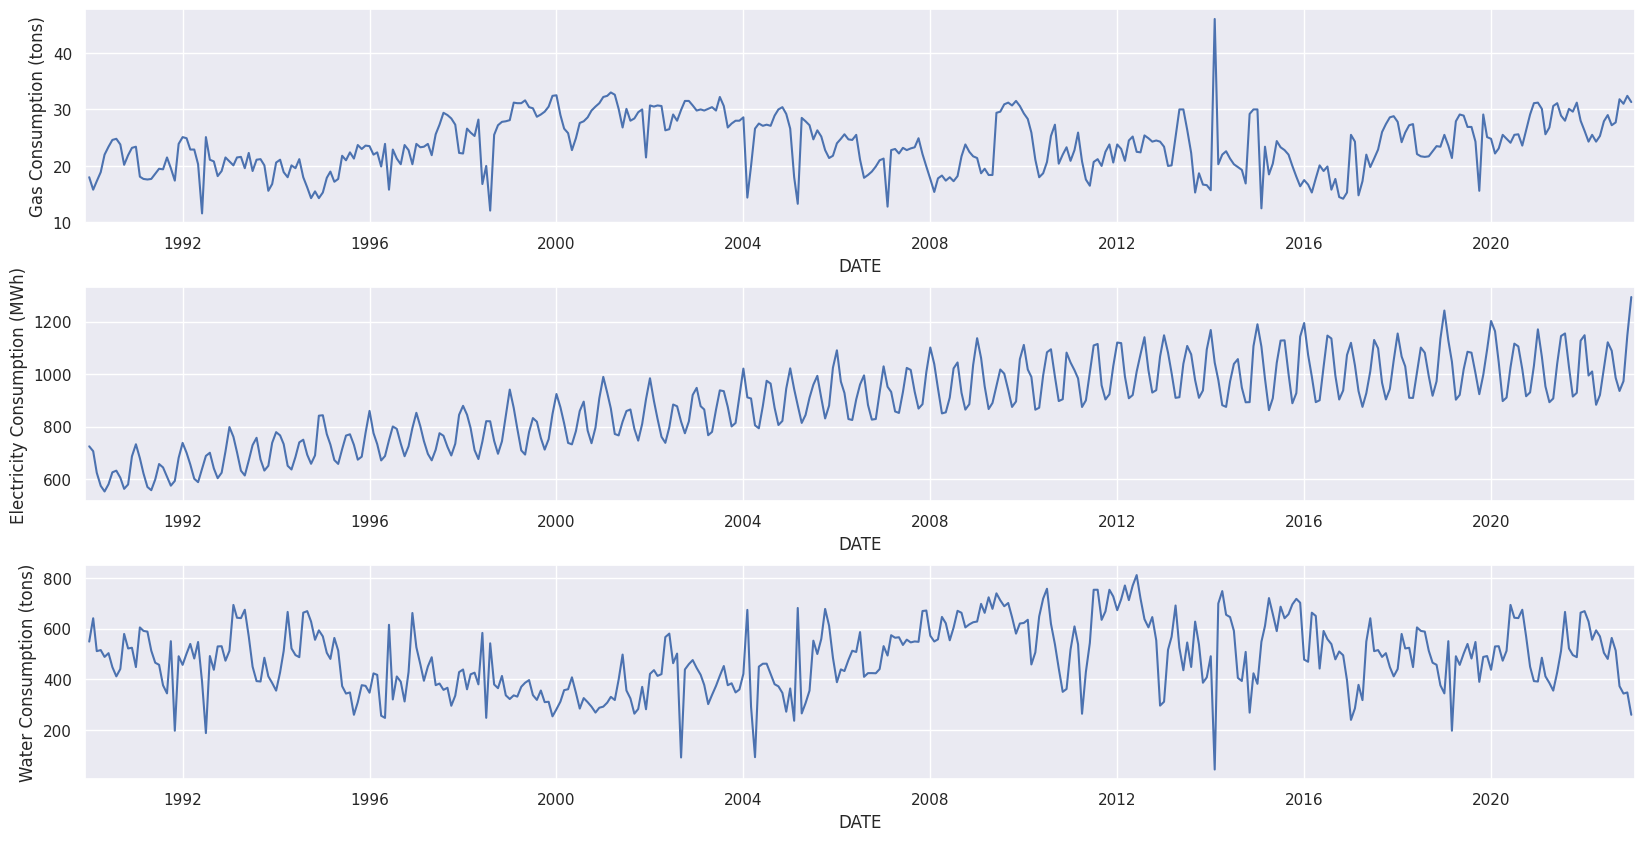

In [11]:
fig, ax = plt.subplots(3,1, figsize = (20,10))

for i in range(0,3):
    sns.lineplot(y = eda_data[d_col[i]], x = eda_data.index, ax = ax[i])
    ax[i].set_xlim(np.datetime64('1989-12-01'), np.datetime64('2023-02-01'))

plt.subplots_adjust(hspace = 0.3)

From the linegraph expressing all 3 features generated earlier, we can see that there are potential outliers that we may have to deal with. 

We shall use the IQR (inter-quartile range) method, in combination with a rolling mean to identify outliers. To identify outliers, we calculate the rolling mean and IQR of the timeseries, followed by the lower and upper fences using both the obtained IQR and rolling mean. Then, we mark points which fall outside of these fences as outliers.

The fences are calculated as follows:
$$
\text Upper Fence = Rolling Mean +(1.5 * IQR)\\
\text Lower Fence = Rolling Mean -(1.5 * IQR)
$$

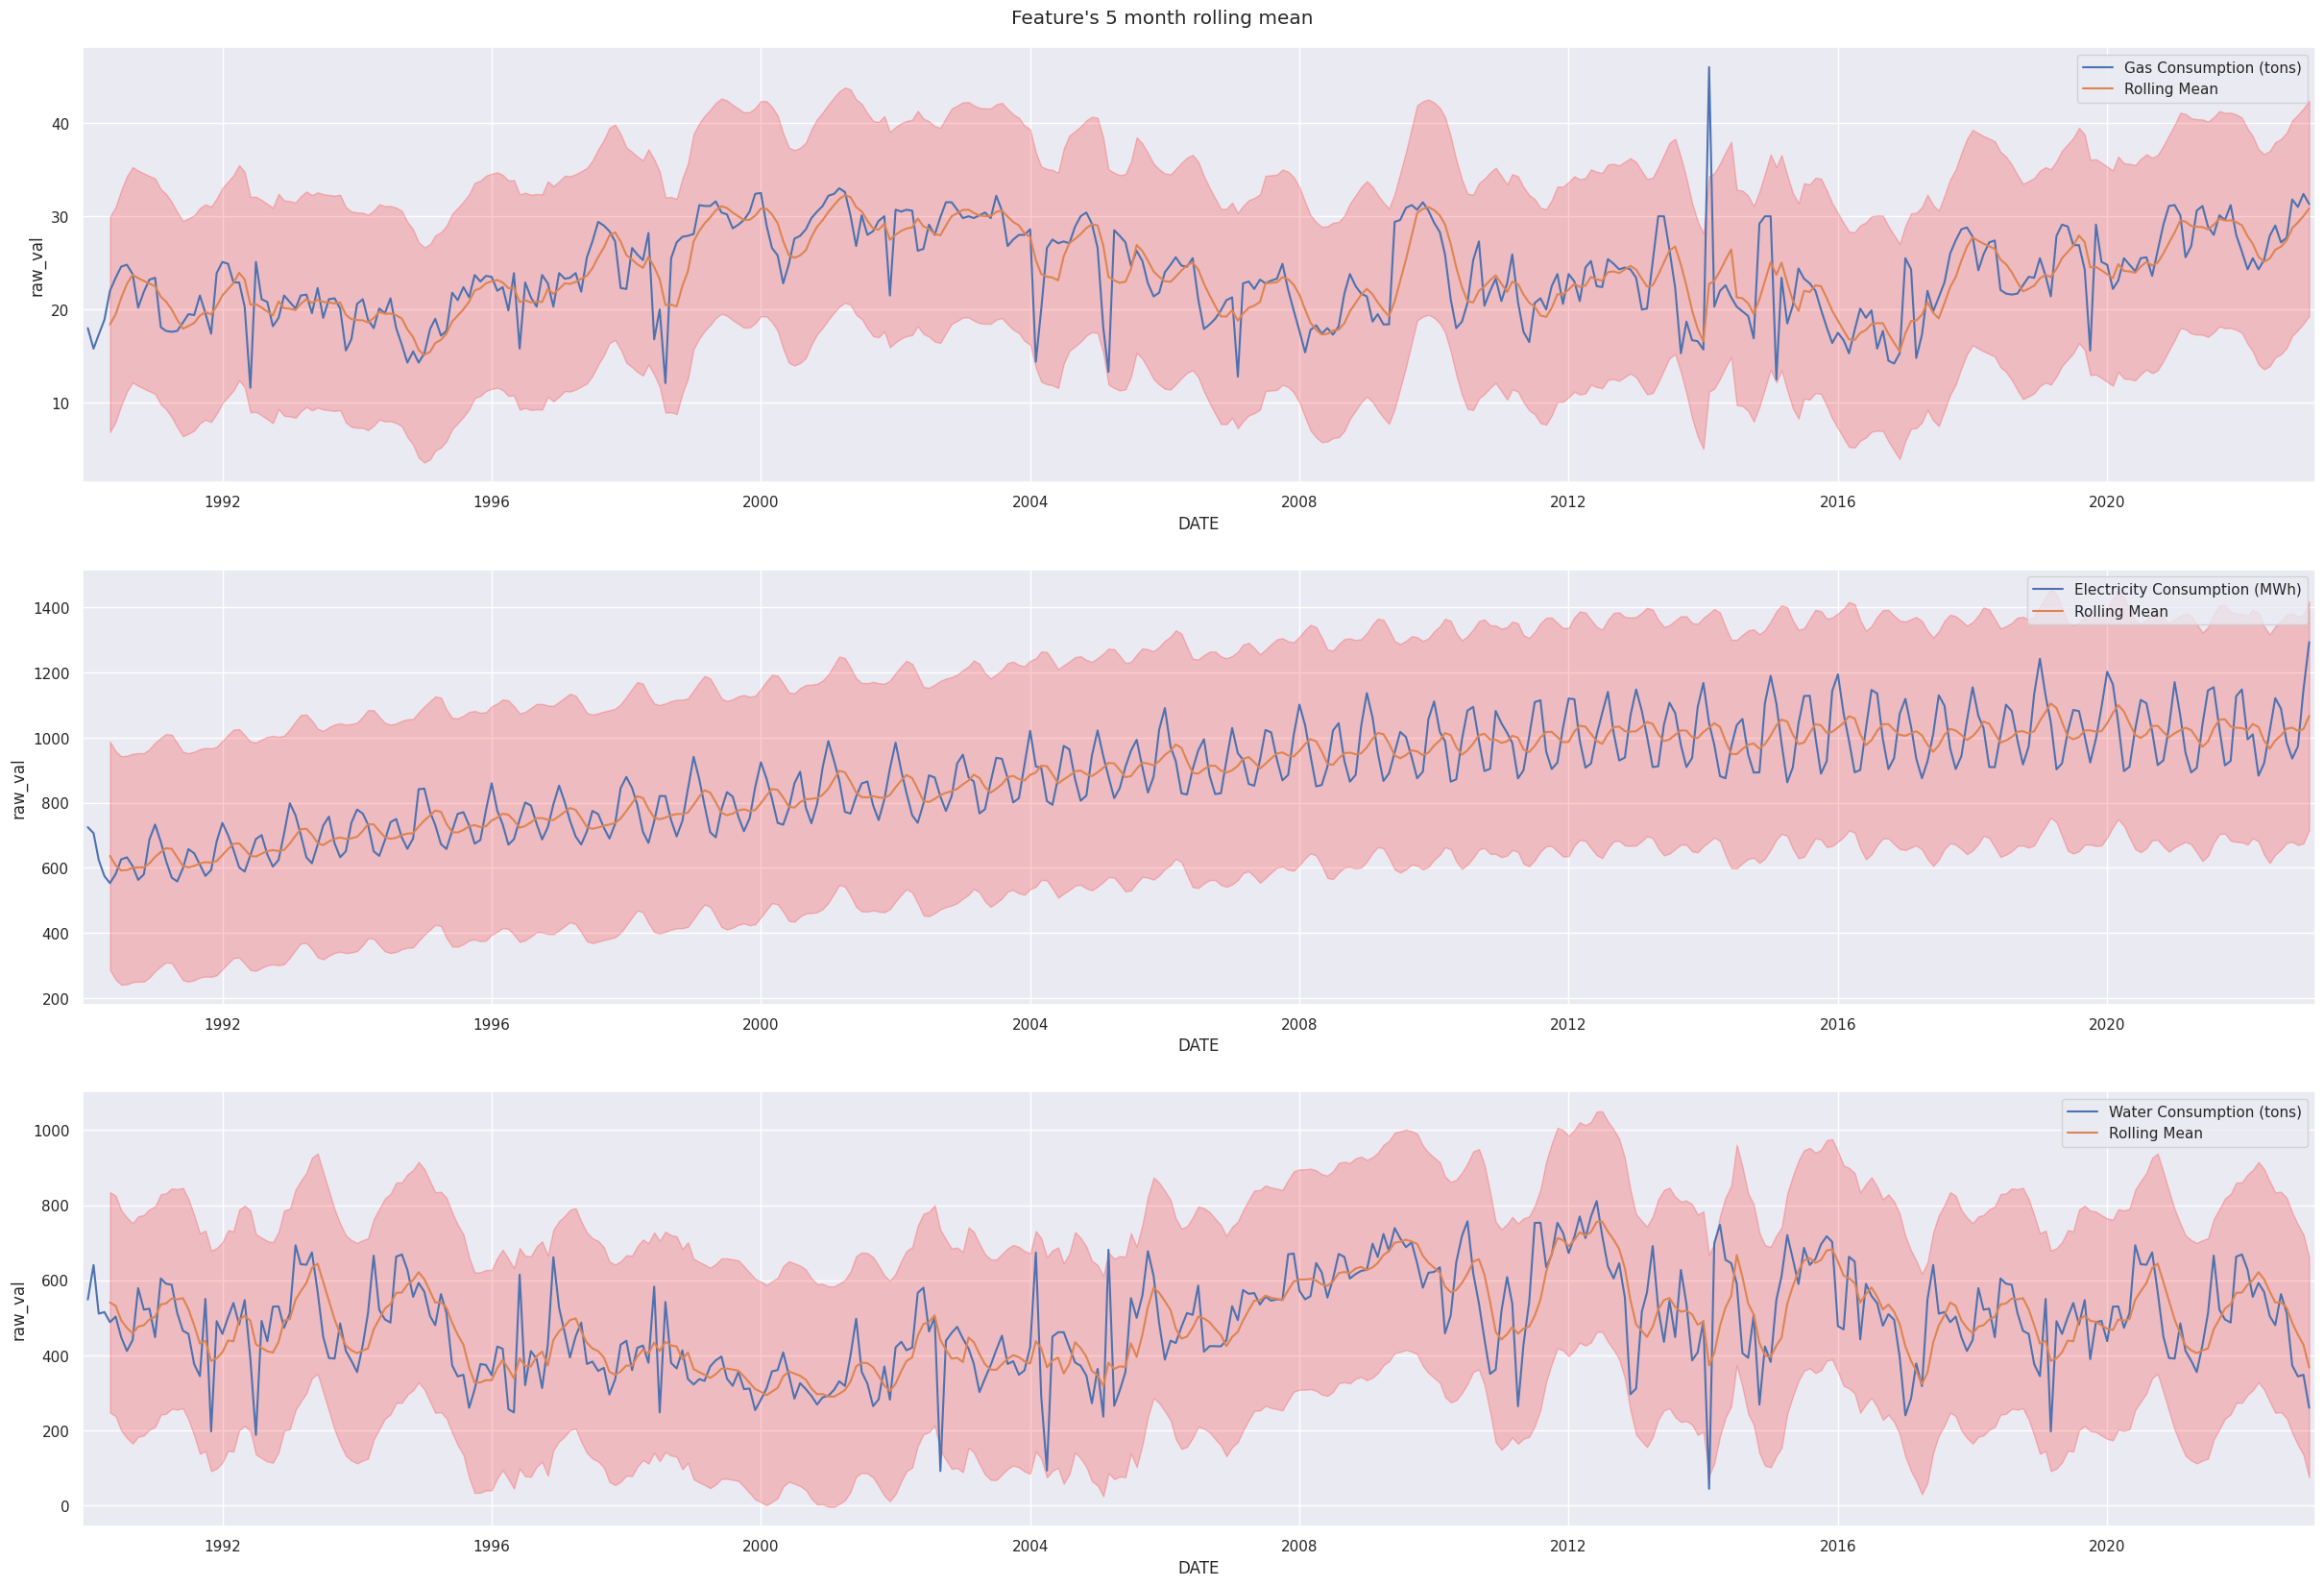

Outlier detection for Gas Consumption (tons)


raw_val  rolling_mean  iqr  up_fence  lo_fence  outliers
DATE                                                                
2014-02-01     46.0         22.74  7.7     34.29     11.19      True

Outlier detection for Electricity Consumption (MWh)


Empty DataFrame
Columns: [raw_val, rolling_mean, iqr, up_fence, lo_fence, outliers]
Index: []

Outlier detection for Water Consumption (tons)


raw_val  rolling_mean    iqr  up_fence  lo_fence  outliers
DATE                                                                  
2002-09-01     91.9        440.76  195.8    734.46    147.06      True
2005-03-01    681.3        380.14  195.8    673.84     86.44      True
2014-02-01     44.4        373.40  195.8    667.10     79.70      True

In [12]:
fig, ax = plt.subplots(3,1, figsize = (30,20))
period = 5
plt.suptitle(f"Feature's {period} month rolling mean", y = 0.9) 

gas_fence = pd.DataFrame(columns = ["raw_val", "rolling_mean", "iqr", "up_fence", "lo_fence", "outliers"])
ele_fence = pd.DataFrame(columns = ["raw_val", "rolling_mean", "iqr", "up_fence", "lo_fence", "outliers"])
h2o_fence = pd.DataFrame(columns = ["raw_val", "rolling_mean", "iqr", "up_fence", "lo_fence", "outliers"])
fence_arr = [gas_fence, ele_fence, h2o_fence]

for fence, col in zip(fence_arr, d_col):
    fence["raw_val"] = data[col]
    fence["rolling_mean"] = data[col].rolling(window = period).mean()
    fence["iqr"] = data[col].quantile(0.75) - data[col].quantile(0.25)
    fence["lo_fence"] = fence["rolling_mean"] - (1.5 * fence["iqr"])
    fence["up_fence"] = fence["rolling_mean"] + (1.5 * fence["iqr"])
    fence["outliers"] = (fence["raw_val"] < fence["lo_fence"]) | (fence["raw_val"] > fence["up_fence"])


for fence, col, ax in zip(fence_arr, d_col, ax):
    sns.lineplot(fence["raw_val"], ax = ax, label = col)
    sns.lineplot(fence["rolling_mean"], ax = ax, label = "Rolling Mean")
    ax.fill_between(data.index, fence["up_fence"], fence["lo_fence"], alpha = 0.2, color = "red", label = "IQR")
    ax.set_xlim(np.datetime64('1989-12-01'), np.datetime64('2023-02-01'))
plt.show()

for fence, col in zip(fence_arr, d_col):
    print(f"Outlier detection for {col}")
    display(fence[fence["outliers"] == True])

From the above, we can see that there a few outliers in the dataset, with 1 in "Gas Consumption", and 3 in "Water Consumption". We shall deal with them later, in the data preparation stage.

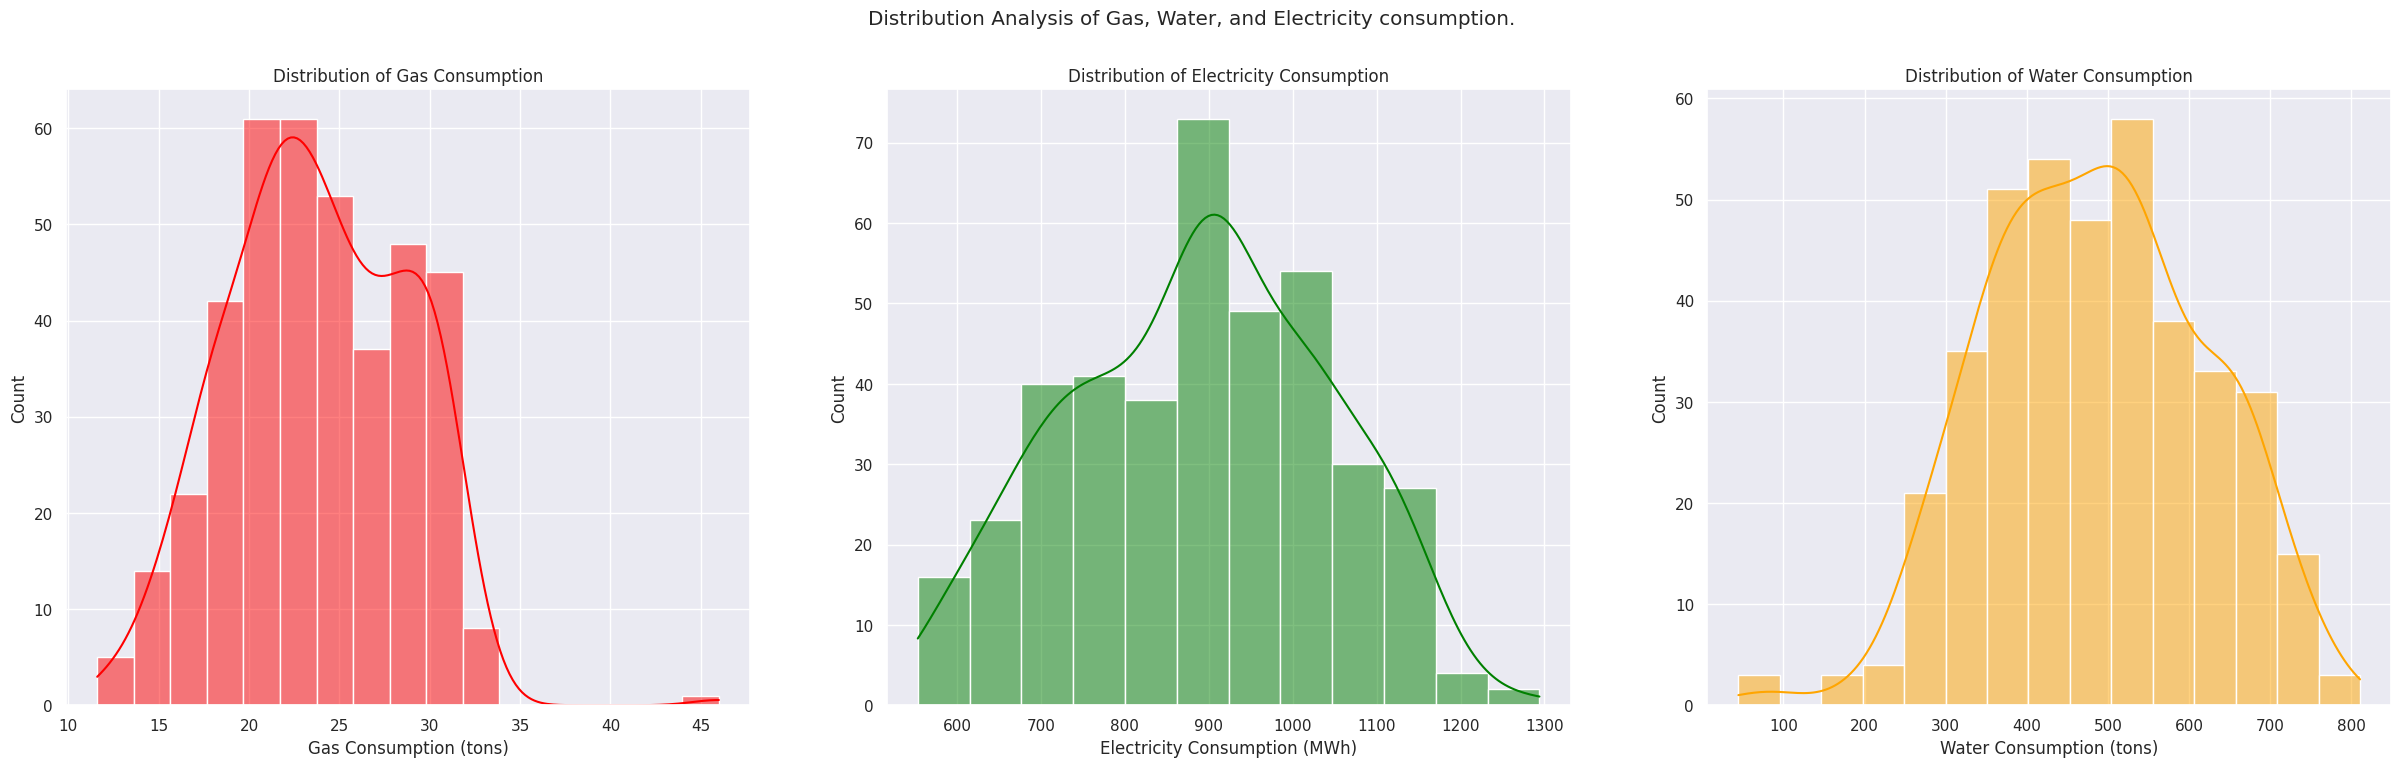

In [13]:
fig, ax = plt.subplots(1,3, figsize = (30,8))

sns.histplot(data = eda_data, x = d_col[0], ax = ax[0], kde = True, color = "red")
sns.histplot(data = eda_data, x = d_col[1], ax = ax[1], kde = True, color = "green")
sns.histplot(data = eda_data, x = d_col[2], ax = ax[2], kde = True, color = "orange")

ax[0].set_title('Distribution of Gas Consumption')
ax[1].set_title('Distribution of Electricity Consumption')
ax[2].set_title('Distribution of Water Consumption')
fig.suptitle('Distribution Analysis of Gas, Water, and Electricity consumption.')

plt.show()

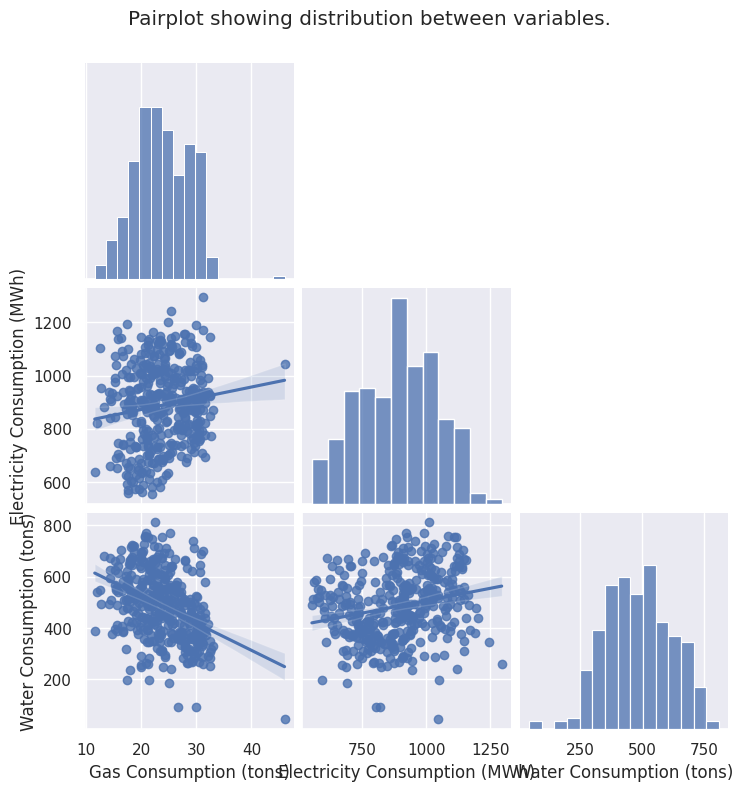

In [14]:
ax = sns.pairplot(eda_data, corner = True, kind = "reg")
ax.fig.suptitle("Pairplot showing distribution between variables.", y = 1.05)
plt.show()

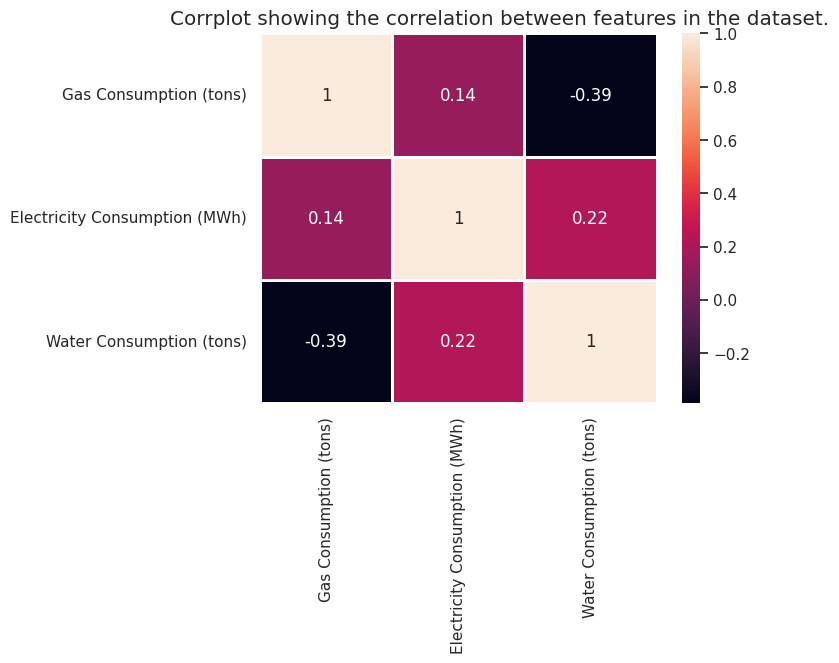

In [15]:
sns.heatmap(eda_data.corr(), annot = True, linewidth = 1)
plt.suptitle("Corrplot showing the correlation between features in the dataset.", y = 0.93)
plt.show()

From the above corrplot, we can see that there is some mild correlation between the features. There is a weak negative correlation between water and gas consumption (r = -0.39), and a weak positive correlation between electricity and water (r = 0.22), as well as between electricity and gas consumption (r = 0.14).

One thing that we can do to gain additional insights into our data would be to perform seasonal decompositon. It is good for a timeseries analysis, as it breaks down a time series into it's component parts, namely:
- Trend (general direction of a series over a long period of time)
- Seasonality (a distinct, repeating pattern observed in regular intervals due to various seasonal factors.)
- Residual (irregular component consisting of the fluctuations in the time series after removing the previous components)

It helps us to understand the underlying patterns in the data, and identify outliers.

However, as the dataset given spans a long period of time, from 1990 to 2023, and also appears to have a trend-cycle component, we shall use a more complicated method of seasonal decomposition, namely, Seasonal-Trend decomposition using LOESS, or STL.

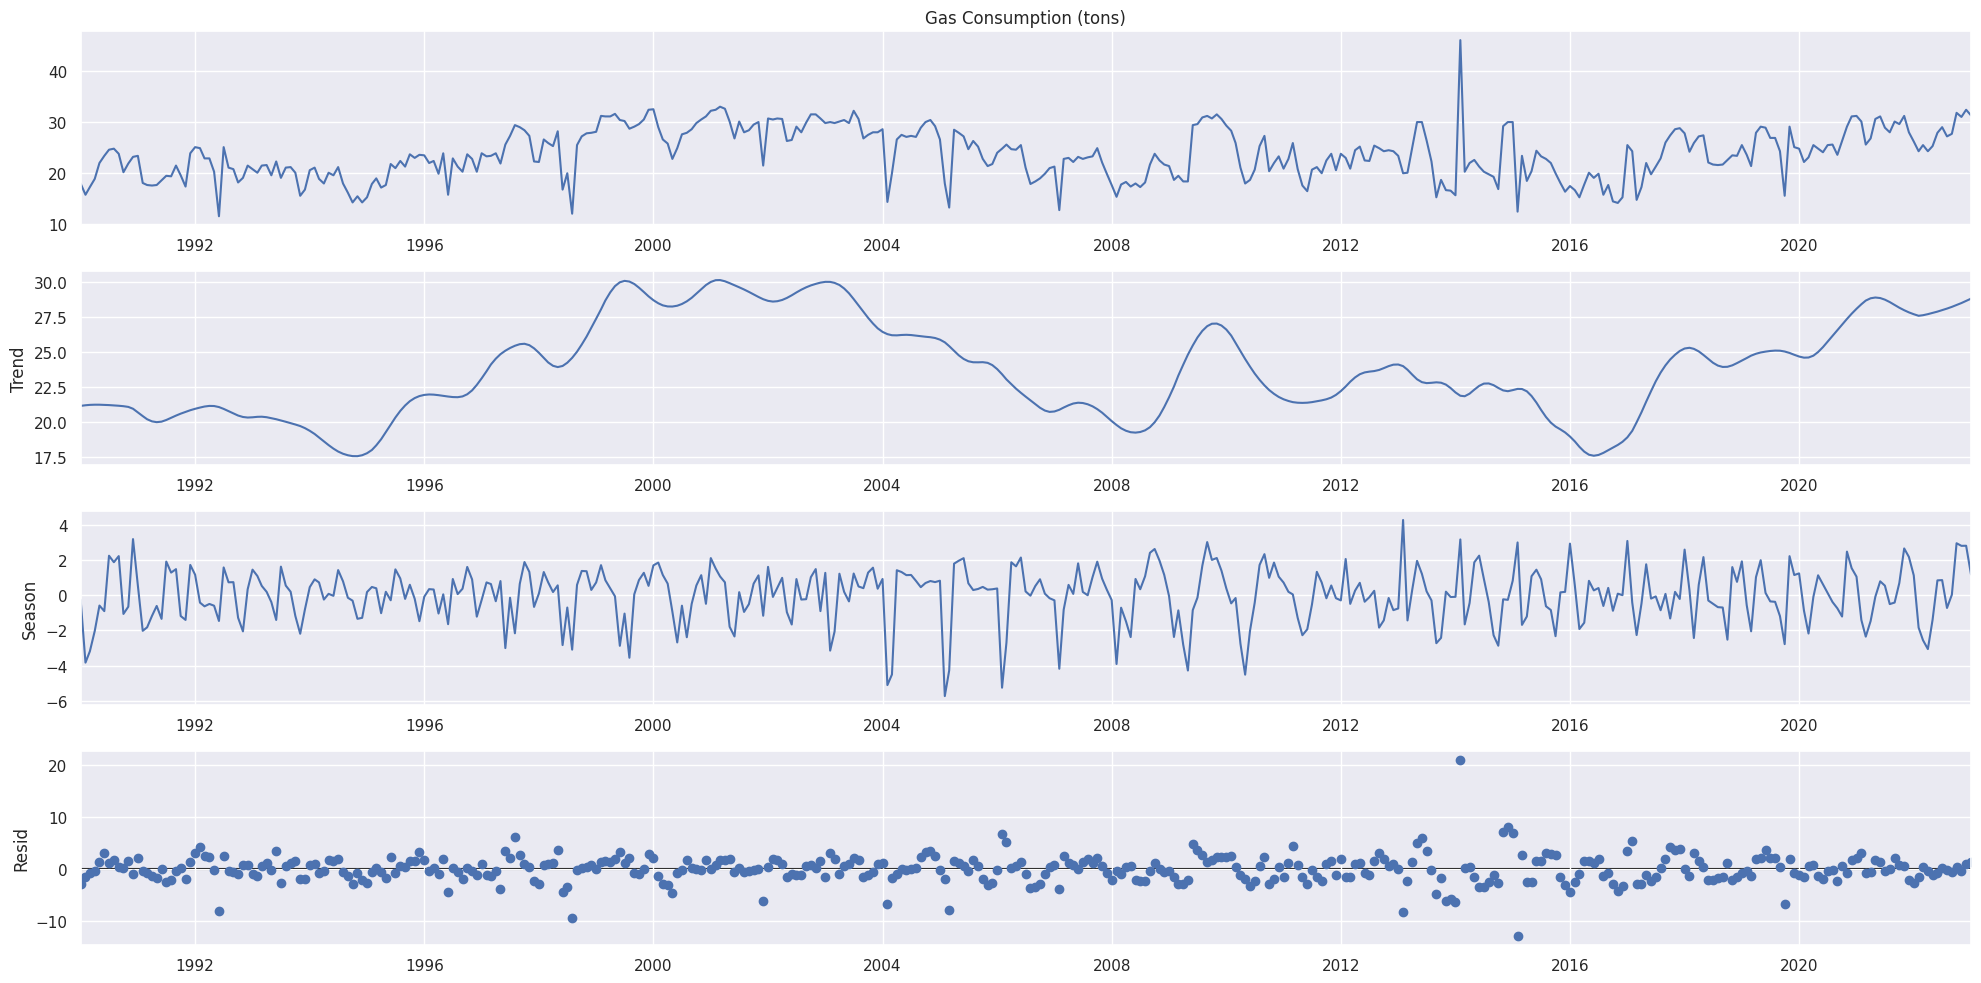

In [16]:
plt.rc("figure", figsize = (20,10))
result = STL(eda_data[d_col[0]])
result = result.fit()
result.plot()
plt.show()


The output tells us that gas consumption has a strong seasonal component. This is evident in the seasonal component graph, which shows a clear pattern of variation over time. However, the strength of the seasonality seems to change, and is inconsistent over time. However, while it is inconsistent, it tends to be strong, and has alot of change over the season.

The trend component of the graph shows a large amount of fluctuation, with peaks and valleys over time. 

The residual component of the graph shows some random variation, but it is relatively small compared to the seasonal and trend components, suggesting that the variation in gas consumption is mostly due to seasonal and trend factors, rather than random noise.

Overall, the seasonal_decomposition output suggests that gas consumption is strongly influenced by seasonal factors. This information could be used to forecast future values of gas consumption or to identify opportunities to exploit seasonal patterns.

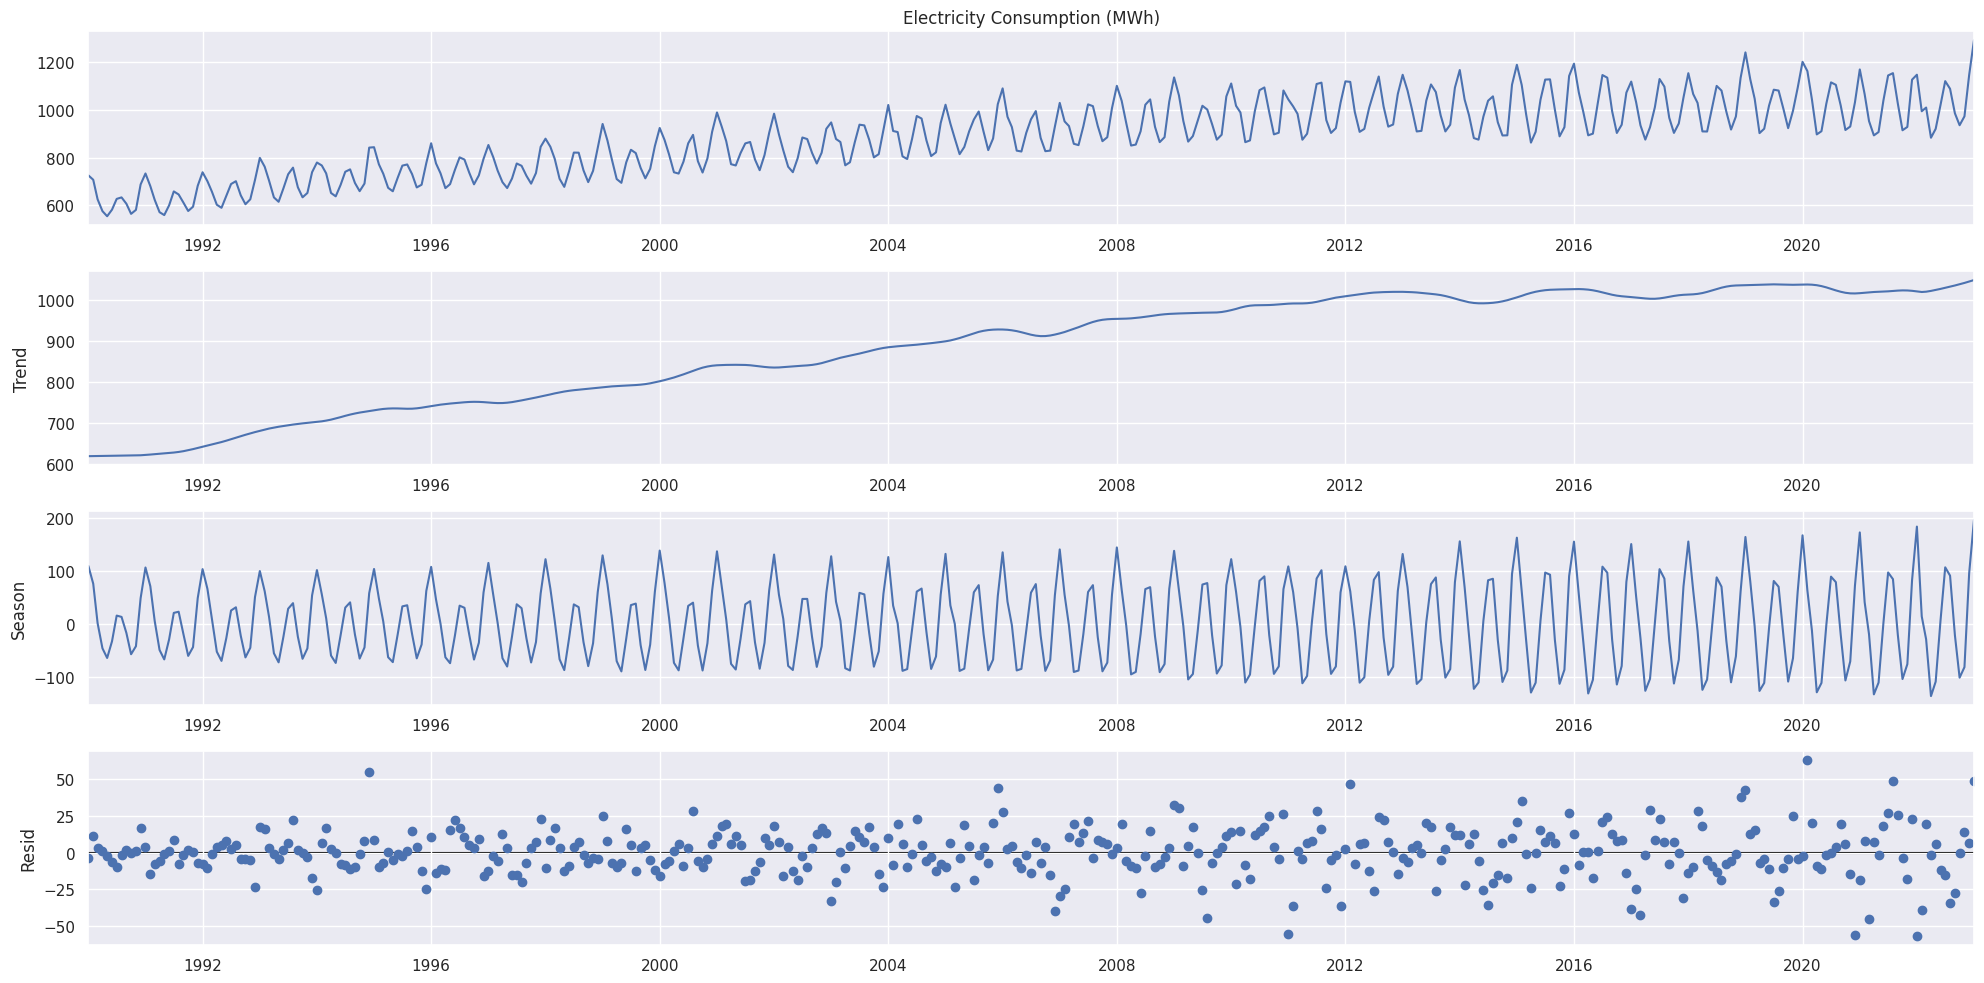

In [17]:
result = STL(eda_data[d_col[1]])
result = result.fit()
result.plot()
plt.show()

The output tells us that electricity consumption has a strong seasonal component, which is evident in the seasonal component of the graph, which shows a clear pattern of change over time. The consumption seems to repeat itself on an annual basis, and is very consistent, suggesting that electricity consumption is influenced by holidays/seasons.

Electricity consumption seems to be on a upward trend, as seen by the trend part of the decomposition increasing over time.

The residual component of the output shows some random variation, but it is relatively small compared to the seasonal and trend components. This suggests that the variation in the feature is mostly due to seasonal and trend factors, rather than random noise.

Overall, the seasonal decompositon of electricity consumption seems to suggest that the feature is heavily influenced by the time of year.

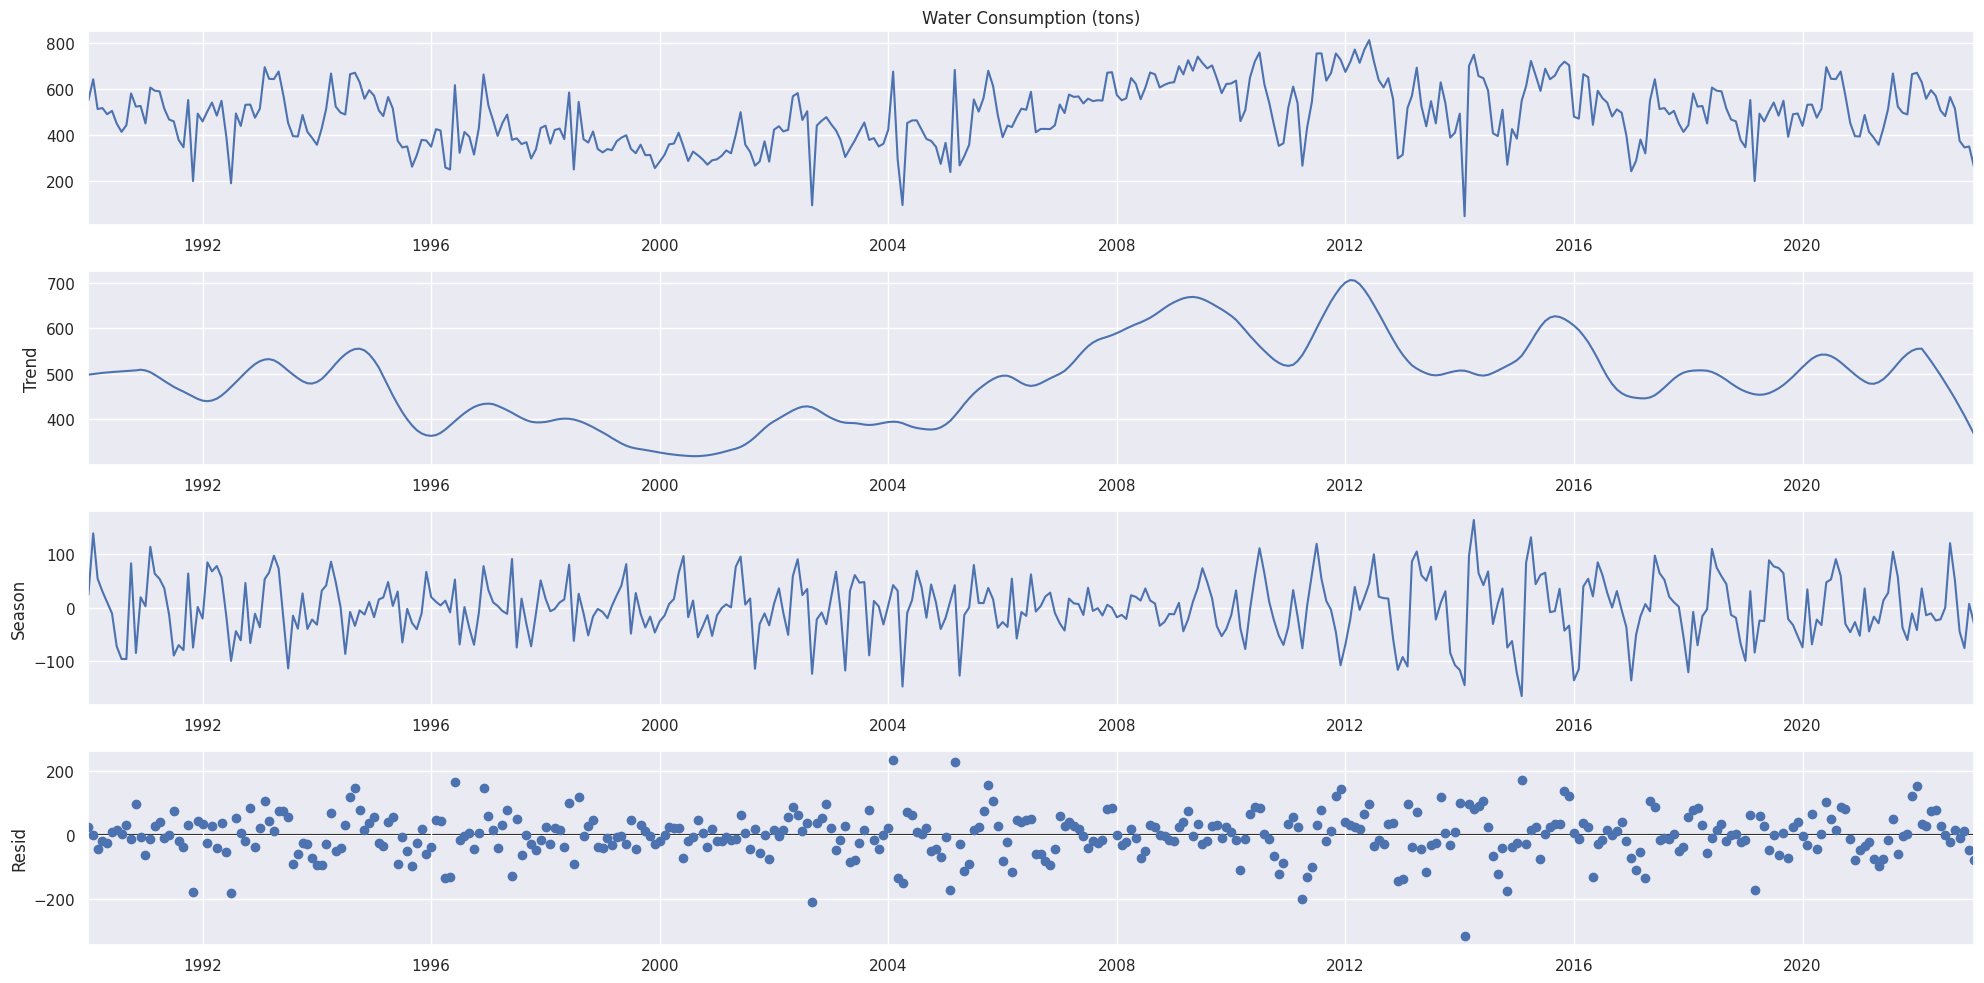

In [18]:
result = STL(eda_data[d_col[2]])
result = result.fit()
result.plot()
plt.show()

From the output, we can see that water consumption has a strong seasonal component. This is evident in the seasonal component graph, which shows a clear pattern of variation over time. The pattern repeats every 12 months, which suggests that the feature is influenced by annual factors such as the weather or holidays. However, it's strength varies with time, and is not consistent.

The trend component of the graph also shows fluctations, with a drop in the consumption between 1996 and 2004, then a rise bewteen 2008 and 2016. This tells us that the feature has generally increased in value over time, but is still subject to external factors.

The residual section of the decomposition shows us that generally small, with some random variation. However, there is a few outliers, with a record in 2014 reporting 0. This is likely to be a errorneous recording, and will require more research into it.

Now, we shall test to see if the features in the dataset are stationary. A stationary feature is one whose statistical properties (mean, variance, and autocorrelation structure) do not change over time.

Having a stationary dataset will allow us to use more complicated models like ARIMA and SARIMA. If the dataset is not stationary, it can make it quite hard to model and forecast, as it has statistical properties that change over time. We shall perform the **Augmented Dickey-Fuller (ADF) test** to identify if the features in the dataset are stationary or not.

The test determines if a timeseries has a unit root. If a unit root is present, the timeseries is said to be non-stationary, and vice versa. The test also calculates a test statistic, which shows if the coefficient of the lagged values is significantly different from 1 (shows presence of a unit root).


In [19]:
def adf_test(series, confidence_interval = 0.05): 
    result = adfuller(series)
    print(f"P-value: {result[1]:.3f}")
    print(f"Used Lag: {result[2]}")
    print(f"Critical Value: {result[4]['5%']}")
    if result[1] < confidence_interval:
        print("Reject H0. There is evidence that the time series is stationary.")
    else:
        print("Fail to reject H0. There is insufficient evidence that the time series is stationary.")

In [20]:
print(f"Stationarity test, with significance level at 0.05. \n")

for i in range(0,3):
    print(f"h0: There is a unit root, meaning that {d_col[i]} is non-stationary.\nh1: There is no unit root, meaning that {d_col[i]} is stationary.")
    adf_test(eda_data[d_col[i]])
    print('\n')

Stationarity test, with significance level at 0.05. 

h0: There is a unit root, meaning that Gas Consumption (tons) is non-stationary.
h1: There is no unit root, meaning that Gas Consumption (tons) is stationary.
P-value: 0.011
Used Lag: 6
Critical Value: -2.8689795375849223
Reject H0. There is evidence that the time series is stationary.


h0: There is a unit root, meaning that Electricity Consumption (MWh) is non-stationary.
h1: There is no unit root, meaning that Electricity Consumption (MWh) is stationary.
P-value: 0.186
Used Lag: 15
Critical Value: -2.869155980820355
Fail to reject H0. There is insufficient evidence that the time series is stationary.


h0: There is a unit root, meaning that Water Consumption (tons) is non-stationary.
h1: There is no unit root, meaning that Water Consumption (tons) is stationary.
P-value: 0.000
Used Lag: 4
Critical Value: -2.8689414326247995
Reject H0. There is evidence that the time series is stationary.




From the above, we can see that the "Electricity Consumption (tons)" feature is not stationary. We shall take note of this when we start modelling later.

<hr>
<font size = 5>Data Preparation</font>
<hr>

From analyses in the previous stage, we identified that there are outliers in the dataset. Given the lack of information for the dataset, we are unable to verify if there is a reliable reason for the outliers to be present, such as extreme weather, or holiday events. However, there are a litany of reasons for the outliers to be present, such as human error when recording the data, or instrument malfunction. We shall err on the side of caution, and link these outliers to these errorneous reasons. To deal with the outliers, we shall use imputing to eliminate the outliers to preserve the continiuty of the timeseries.
- To make the imputation easier, we shall drop the values of the columns where a outlier is present. 

In [21]:
for col, fence in zip(d_col, fence_arr):
    data[col][fence["outliers"]] = pd.NA
    display(data[col][fence["outliers"]])

DATE
2014-02-01   NaN
Name: Gas Consumption (tons), dtype: float64

Series([], Name: Electricity Consumption (MWh), dtype: float64)

DATE
2002-09-01   NaN
2005-03-01   NaN
2014-02-01   NaN
Name: Water Consumption (tons), dtype: float64

Given that sklearn is not allowed for this analysis, we shall use the `pandas.fillna()` method to impute the now missing data.

Given that there is a strong seasonal and trend component to the data, we shall use the backfill method to fill in the missing data. This is to preserve the trend and seasonality of the timeseries. Using the mean can cause the values to be replaced with ones outside the trend/seasonal range, distorting the quality of the data in the timeseries.

In [22]:
for col in d_col:
    data[col].fillna(method = "backfill", inplace = True)
    display(data[col][fence["outliers"]])

DATE
2002-09-01    29.9
2005-03-01    13.3
2014-02-01    20.3
Name: Gas Consumption (tons), dtype: float64

DATE
2002-09-01     819.4
2005-03-01     880.9
2014-02-01    1044.2
Name: Electricity Consumption (MWh), dtype: float64

DATE
2002-09-01    438.8
2005-03-01    265.6
2014-02-01    698.9
Name: Water Consumption (tons), dtype: float64

In the below block of code, we analyze the 4 components in the time series, using STL decomposition. We break up the individual components, so that we can identify the strength of the trend and seasonality in our timeseries data.

In [23]:
trends, seasonality, residuals = [], [], []
cols_to_analyze = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
for feature in cols_to_analyze:
    decomposition = STL(feature, robust=True).fit()
    trends.append(decomposition.trend)
    seasonality.append(decomposition.seasonal)
    residuals.append(decomposition.resid)

decompose_df = pd.DataFrame({
    "varianceTrend" : [trend.var() for trend in trends],
    "varianceSeasonalityResidual" : [(season + resid).var() for season, resid in zip(seasonality, residuals)],
    "varianceTrendResidual" : [(trend + resid).var() for trend, resid in zip(trends, residuals)],
    "varianceResiduals":  [resid.var() for resid in residuals],
}, index = data.columns)
decompose_df['Trend Strength'] = decompose_df.apply(lambda feature : max(0, 1 - (feature['varianceResiduals'] / feature['varianceTrendResidual'])), axis = 1)
decompose_df['Seasonal Strength'] = decompose_df.apply(lambda feature : max(0, 1 - (feature['varianceResiduals'] / feature['varianceSeasonalityResidual'])), axis = 1)

decompose_df

varianceTrend  varianceSeasonalityResidual  \
Gas Consumption (tons)             14.192572                    10.074484   
Electricity Consumption (MWh)   17686.544385                  6087.685626   
Water Consumption (tons)         8553.088133                  8997.317137   

                               varianceTrendResidual  varianceResiduals  \
Gas Consumption (tons)                     20.844586           8.303586   
Electricity Consumption (MWh)           18094.385842         494.884779   
Water Consumption (tons)                15478.388173        7365.516447   

                               Trend Strength  Seasonal Strength  
Gas Consumption (tons)               0.601643           0.175781  
Electricity Consumption (MWh)        0.972650           0.918707  
Water Consumption (tons)             0.524142           0.181365

From the dataframe generated, we can see that the feature "Electricity Consumption" has particularly strong seasonality. We shall take note of this, and look to use seasonal models when attempting to forecast later, or removing the seasonality via another layer of differencing.

We shall also split our data into a training and testing set, so that we can actually see how the model performs on unseen data. Ideally, we would allocate 80% of the data for training, and leave 20% for test data. However, as the dataset given is unable to be split in a perfect 80/20 ratio, we shall round the value of the index at 80%.

In [24]:
# display()
train_data = data.iloc[:round(0.8 *len(data))]
test_data = data.iloc[round(0.8 *len(data)):]

train_start = train_data.index[:1]
train_end = train_data.index[-1:]
test_start = test_data.index[:1]
test_end = test_data.index[-1:]

display(train_data, test_data)
print(f"Length of training set: {len(train_data)}, {len(train_data)/len(data)*100:.3f}% of original dataset.")
print(f"Length of testing set: {len(test_data)}, {len(test_data)/len(data)*100:.3f}% of original dataset.")

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   
...                            ...                            ...   
2016-02-01                    16.7                         1073.8   
2016-03-01                    15.3                          991.0   
2016-04-01                    17.8                          893.6   
2016-05-01                    20.1                          900.7   
2016-06-01                    19.1                         1028.2   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4  
...                              ...  
2016-02-01                     469.2  
2016-03-01                     662.7  
2016-04-01                     649.9  
2016-05-01                     442.5  
2016-06-01                     590.7  

[318 rows x 3 columns]

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
2016-07-01                    19.9                         1147.1   
2016-08-01                    15.8                         1136.0   
2016-09-01                    17.7                          994.7   
2016-10-01                    14.5                          903.6   
2016-11-01                    14.2                          938.1   
...                            ...                            ...   
2022-09-01                    27.7                          986.2   
2022-10-01                    31.8                          936.1   
2022-11-01                    31.0                          973.4   
2022-12-01                    32.4                         1147.2   
2023-01-01                    31.3                         1294.0   

            Water Consumption (tons)  
DATE                                  
2016-07-01                     558.5  
2016-08-01                     538.8  
2016-09-01                     478.8  
2016-10-01                     509.7  
2016-11-01                     494.8  
...                              ...  
2022-09-01                     513.3  
2022-10-01                     373.1  
2022-11-01                     343.9  
2022-12-01                     348.3  
2023-01-01                     260.2  

[79 rows x 3 columns]

Length of training set: 318, 80.101% of original dataset.
Length of testing set: 79, 19.899% of original dataset.


<hr>
<font size = 5>Initial Modelling</font>
<hr>

We shall first create some functions for us to use later.

In [25]:
def all_feat_vis(data_arr, model_arr, title_arr, train_data = None, test_data = None, diagnostics = False):
    modf1, modf2, modf3 = None, None, None
    modSummary = [modf1, modf2, modf3]
    modPerf = pd.DataFrame(columns = ["MAE", "AIC", "BIC", "MAPE"])
    fig, [ax0, ax1, ax2] = plt.subplots(3,1, figsize = (30,18))
    axes = [ax0, ax1, ax2]
    fig2 = plt.figure(figsize = (25,10))
    fig3 = plt.figure(figsize = (25,10))
    fig4 = plt.figure(figsize = (25,10))
    diagAx = [fig2, fig3, fig4]


    if train_data is not None:
        for train, ax in zip(train_data, axes):
            ax.plot(train, label = "Training Data")

    count = 0
    for model, title, data, ax, test, diag in zip(model_arr, title_arr, data_arr, axes, test_data, diagAx):

        model = model.fit()
        predicted = model.predict(start = test_start[0], end = test_end[0])

        modMAE = np.mean(np.abs(test - predicted))
        modMAPE = np.mean(np.abs(test - predicted) / test)
        modSummary[count] = model.summary()
        modPerfDict = {"AIC": model.aic, "BIC": model.bic, "MAE":modMAE, "MAPE": modMAPE}
        modPerf = modPerf.append(modPerfDict, ignore_index = True)

        ax.plot(predicted, label='Testing Prediction', color = "red")
        ax.plot(data, label = "Original Data", color = "C1")
        ax.legend()
        ax.set_xlim(np.datetime64('1989-12-01'), np.datetime64('2023-02-01'))
        ax.set_title(f"{title}, MAE = {modMAE}")

        if diagnostics:
            model.plot_diagnostics(fig = diag, lags = 24)
        count += 1

    if test_data is not None:
        for test, ax in zip(test_data, axes):
            ax.plot(test, label = "Testing Data", color = "green")
    
    fig.show()
    if diagnostics:
        fig2.show()
        fig3.show()
        fig4.show()

    modPerf["Feature"] = [d_col[0], d_col[1], d_col[2]]
    modPerf.set_index("Feature", inplace = True)
    display(modPerf)
    return model_arr, modSummary, modPerf

Now, we can start attempting to make predictions on the dataset. There are a few models that we can use to make forecasts on the dataset, namely
- Holt-Winters Exponential Smoothing
  - The Holt-Winters Exponential Smoothing Method is a three-parameter model which uses exponential smoothing to model the trend, seasonality, and error of a time-series.
- ARIMA (Auto Regressive Integrated Moving Average)
  - ARIMA Is a general class of models which can be used to forecast timeseries with trend, seasonality, and autocorrelation. ARIMA models are made of 3 components, AutoRegressive (AR), Integrated (I), and Moving Average (MA). The AR component models the relationship between past values of the time series and the current value. The MA component models the relationship between the current value of the time series and past errors. The I component models the number of times that the time series has been differenced to remove the trend. When attempting to use it to model, there are 3 parameters, 
    - *p*, representing the number of lagged/autoregressive values
    - *d*, representing the degree of differencing/integration
    - *q*, representing the number of moving average/error terms.
<br>
- SARIMA  (Seasonal Auto Regressive Integrated Moving Average)
  - SARIMA is a specalized version of ARIMA models which are specially designed for timeseries which have seasonality. It is made of the same components as are present in a ARIMA model, but includes a seasonal component. It has the same basic parameters as a ARIMA model, but has 4 additional parameters for the seasonal component of the data.
    - *P*, representing the number of lagged/autoregressive values
    - *D*, representing the degree of differencing/integration
    - *Q*, representing the number of moving average/error terms.
    - *s*, representing the length of the seasonal cycle
<br>
- VARMAX (Vector Autoregressive Moving Average with eXogenous regressors)
  - VARMAX is a type of time series model that can be used to forecast multiple variables at the same time. It is a multivariate extension of the already explained ARIMA model, and can incorporate exogenous variables.
  - We use VARMAX, but not ARIMAX or SARIMAX in this analysis, as we want to see if the three features present in the dataset affect each other, and not if there are external variables at play.

There are also types of models we can use, like ARIMAX and SARIMAX, which include exogenous variables (variables which are not part of, but may influence the timeseries) in it's forecast. However, as there are no other features in the dataset which influence the outcome, we shall not use them for this analysis.

We shall use the following metrics to help us in our analysis.
- Akaike Information Criterion (AIC)
  - The AIC is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. It is calculated from the number of independent variables used to build the model , as well as the the maximum likelihood estimate of the model (how well the model reproduces the data). The formula for AIC is as follows:
$$
\text AIC = -2 * log(L) + 2k\\
\\
\text{L is the likelihood of the data under the model, calculated using }\\ L = P(x_{1}, x_{2}, x_{3},... x_{n}| \theta)\\
\text {Where }  
x_n 
\text { represents the data points, and } \theta 
\text { are the parameters of the model.}
$$
- Bayesian Information Criterion (BIC)
  - The BIC is a model selection criterion that is used to choose between different models that fit the same data. BIC is similar to AIC, but it penalizes the likelihood of the data under the model for the number of parameters in the model and the number of data points. This is done to prevent overfitting, which is a problem that occurs when a model is too complex and fits the noise in the data instead of the underlying signal. The formula for BIC is as follows:
$$
\text BIC = -2 \ log(L) + k\log(n)\\
\\
\text{L is the likelihood of the data under the model, calculated using }\\ L = P(x_{1}, x_{2}, x_{3},... x_{n}| \theta)\\
\text {Where }  
x_n 
\text { represents the data points, and } \theta 
\text { are the parameters of the model.}
$$
- Mean Absolute Error (MAE)
  - MAE is a measure of error that is used to evaluate the performance of a forecasting model. MAE is calculated by taking the average of the absolute values of the errors between the predicted values and the actual values. 
$$
MAE = \sum_{i=1}^{D}|x_i-y_i|
$$
- Mean Absolute Percentage Error (MAPE)
  - MAPE is a measure of error that is used to evaluate the performance of a forecasting model. MAPE is calculated by taking the average of the absolute percentage errors between the predicted values and the actual values. The formula is as follows:
$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{{y_{\text{true}}[i] - y_{\text{pred}}[i]}}{{y_{\text{true}}[i]}} \right| \times 100
$$

<hr>
<font size = 5>Model Evaluation </font>
<hr>

We shall start modelling using Holt-Winters Expontential Smoothing, then moving onto the more complicated ARIMA models. We shall also use it as a baseline for our later models.

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          6.254566   768.185525   828.378347  0.240195
Electricity Consumption (MWh)  43.932817  2026.269234  2086.462056  0.043155
Water Consumption (tons)       86.140110  2954.496869  3014.689691  0.218718

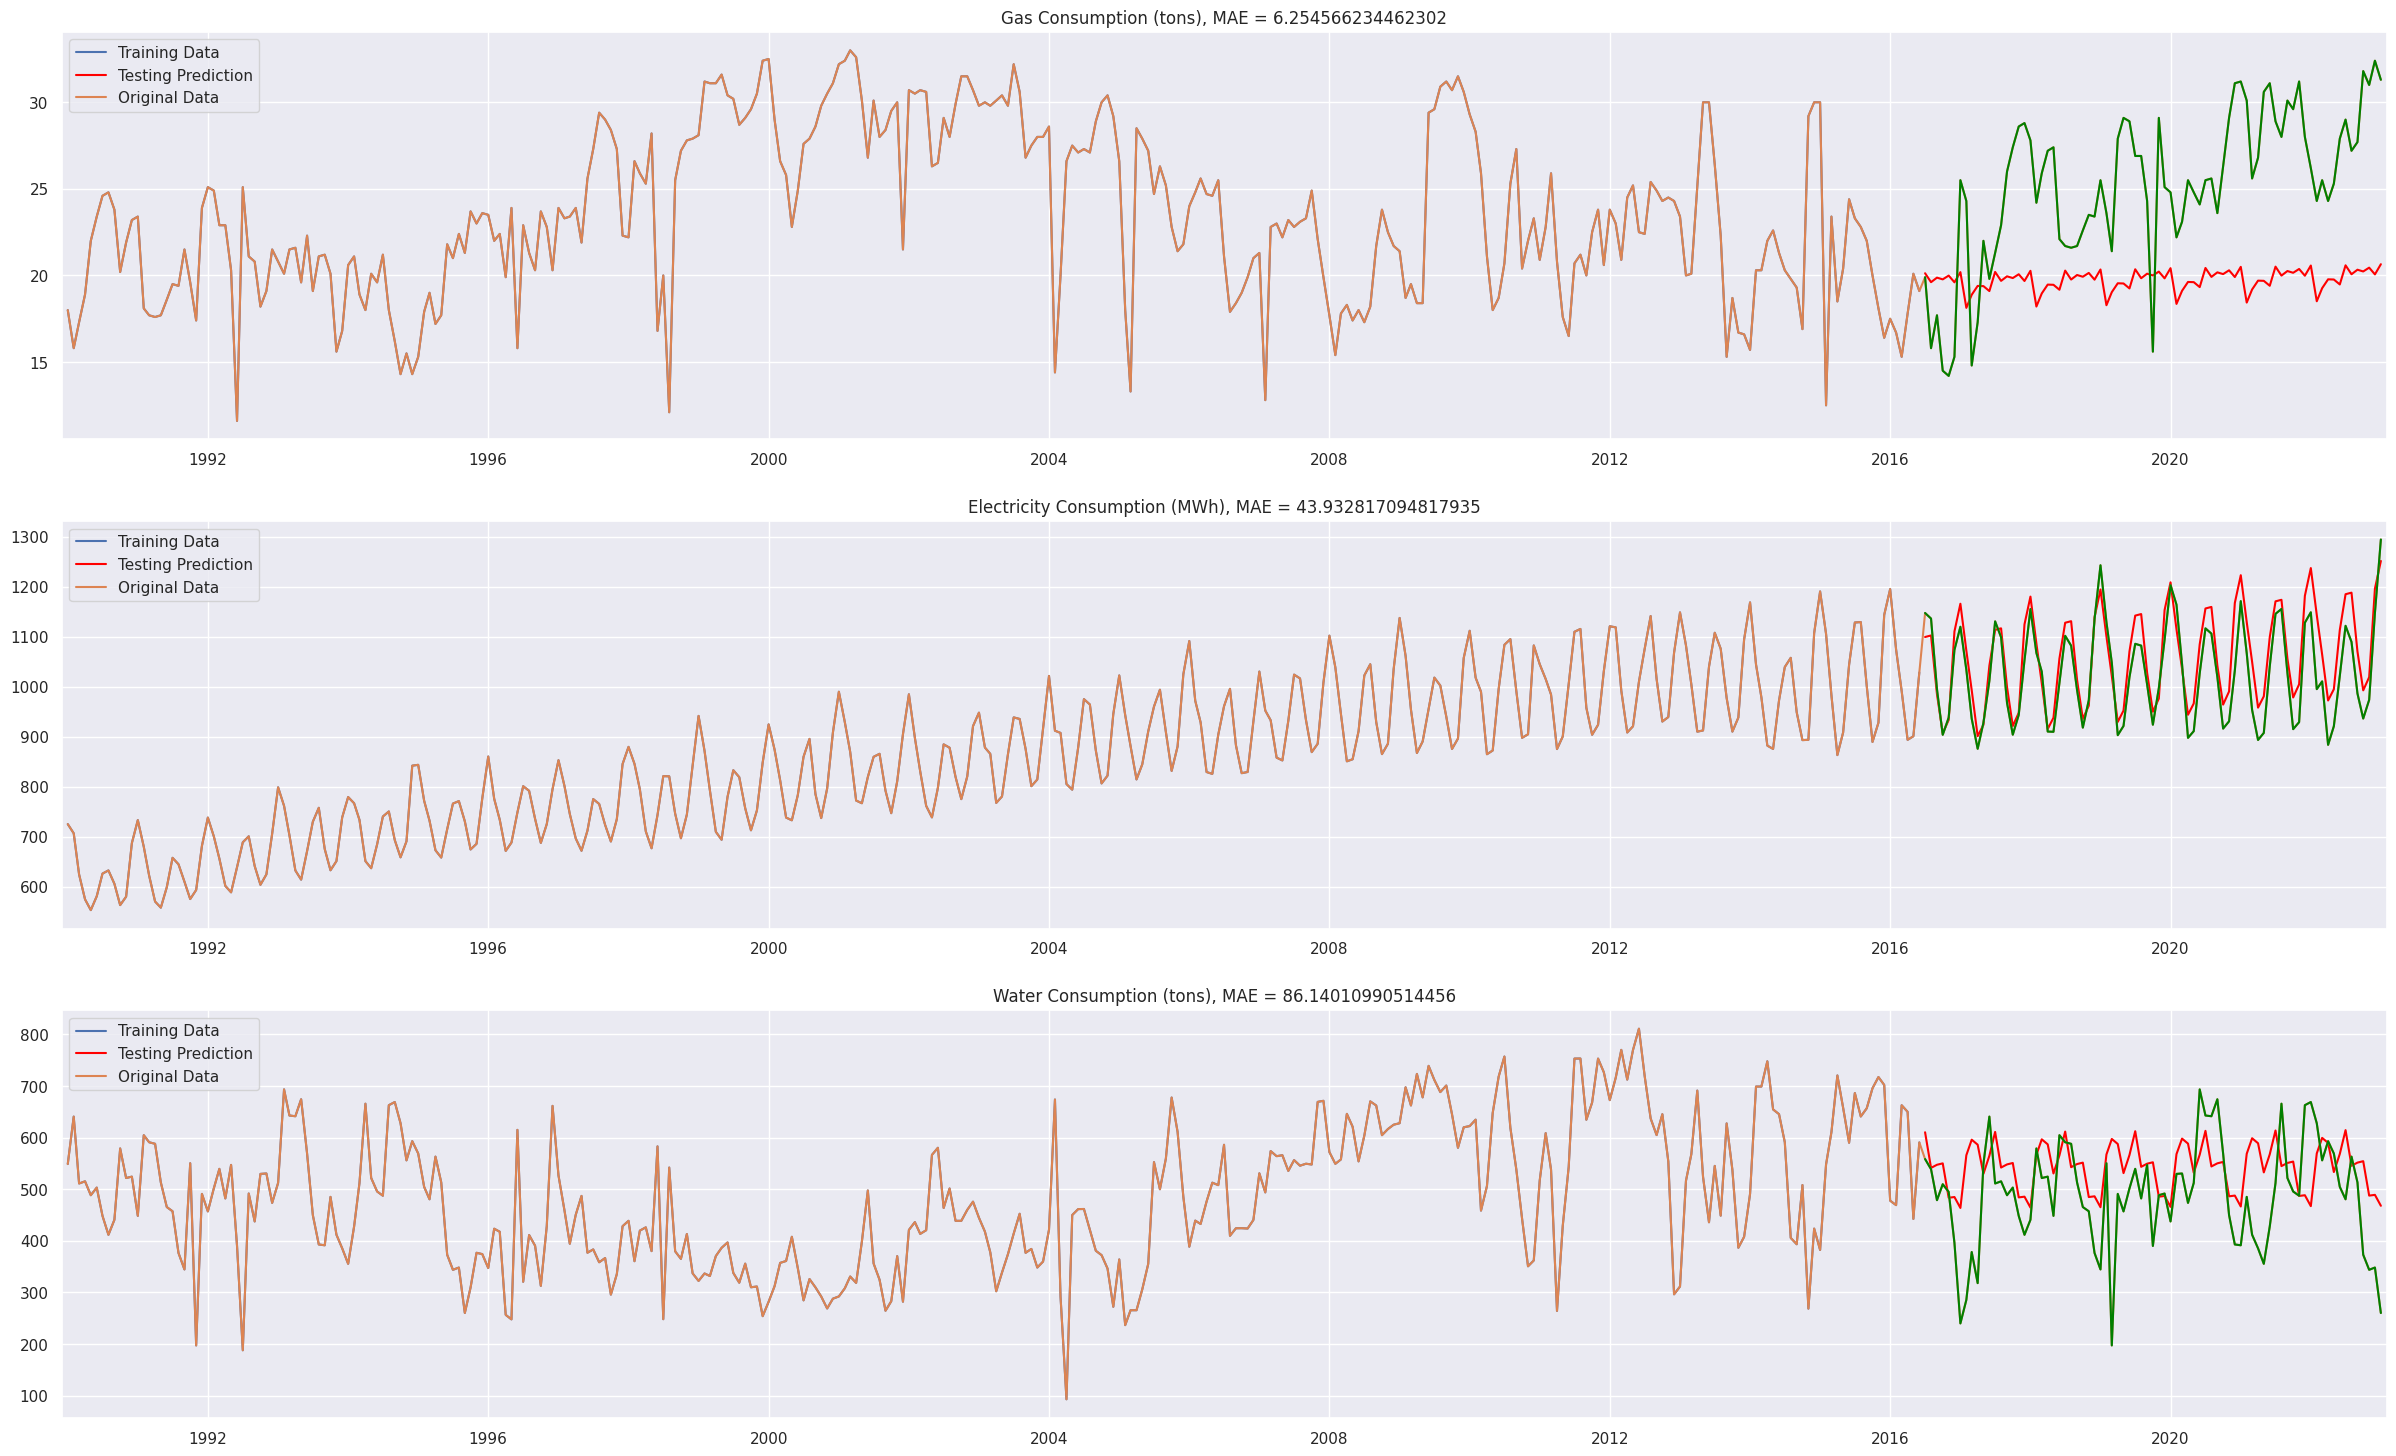

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [26]:
expSmoothModel1 = ExponentialSmoothing(train_data[d_col[0]], trend = "add", seasonal = "add", missing = "raise")
expSmoothModel2 = ExponentialSmoothing(train_data[d_col[1]], trend = "add", seasonal = "add", missing = "raise")
expSmoothModel3 = ExponentialSmoothing(train_data[d_col[2]], trend = "add", seasonal = "add", missing = "raise")
expSmoothArr = [expSmoothModel1, expSmoothModel2, expSmoothModel3]
expSmoothDataArr = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
expSmoothTrainDataArr = [train_data[d_col[0]], train_data[d_col[1]], train_data[d_col[2]]]
expSmoothTestDataArr = [test_data[d_col[0]], test_data[d_col[1]], test_data[d_col[2]]]
expSmoothTitleArr = d_col
expSmoothModels, expSmoothSummaries, expSmoothPerf = all_feat_vis(expSmoothDataArr, expSmoothArr, expSmoothTitleArr, train_data = expSmoothTrainDataArr, test_data = expSmoothTestDataArr)

From the graph generated from the training data, as well as the predictions from the model, we can see that the model struggles to predict the trend for “Gas Consumption” effectively but seems to be able to fit the trend for “Electricity Consumption” and “Water Consumption” decently well.


<div class = "alert alert-block alert-warning">
We must take note that the MSE, AIC, and BIC scoring metrics are all influenced by the scale of the original data. Hence, we cannot compare the performance of the model across variables, and must compare it from model to model, with each variable being relative to itself.
</div>

Now that we are ready to use the more advanced models, we shall first plot a ACF and PACF graph to help us find the AR and MA components.

- AutoCorrelation Function (ACF)
  - ACF refers to autocorrelation, which is the correlation between two observations at different points in a time series.
- Partial AutoCorrelation Function (PACF)
  - PACF displays the unique correlation between two observations after partialling out the intervening correlations with the other variables.
  
We shall determine these components by identifying the lag where the coefficient is significantly different from 0, outside of the confidence bound. There are also things we need to note, namely, that p and q can be 0.
- p/q will be 0 when PACF/ACF is decaying exponentially.
- p/q will be 0 when there is a spike at p/q on the ACF/PACF plot.

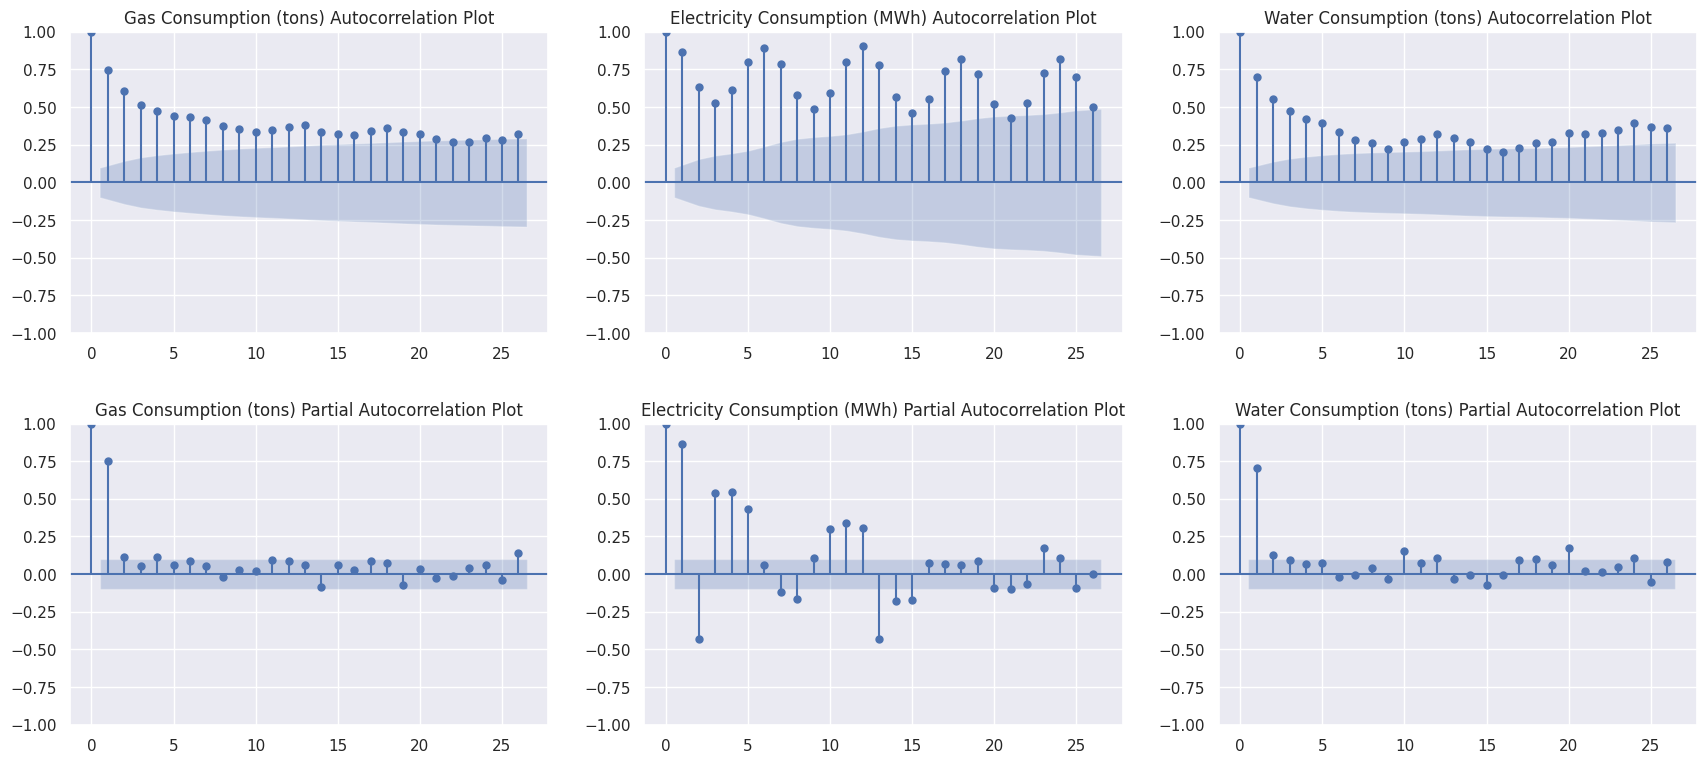

In [27]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3, figsize = (21, 9))
acf_arr = [ax1, ax2, ax3]
pacf_arr = [ax4, ax5, ax6]

for i in range(0,3):
    plot_acf(data[d_col[i]], ax = acf_arr[i])
    plot_pacf(data[d_col[i]], ax = pacf_arr[i])
    plt.subplots_adjust(hspace = 0.3)
    acf_arr[i].set_title(f"{d_col[i]} Autocorrelation Plot")
    pacf_arr[i].set_title(f"{d_col[i]} Partial Autocorrelation Plot")

<font size = 5>Results of ACF/PACF Analysis</font>
<br>
- Gas Consumption
  - Given that the ACF has a gentle tailoff, it suggests that there is a AutoRegressive component to it. However, there is no significant drop in the autocorrelation, hence we shall take the starting value of p to be *1*.
  - Furthermore, since there is a abrupt tailoff in the PACF plot, it suggests that there is also a MovingAverage component to the data. Since that there is a abrupt tailoff at the second lag, we shall take *2* as the starting value for q.
<br>
- Electricity Consumption
  - Given that the ACF repeats itself in a oscillating motion, it is inconclusive. Hence, we take the p value for Electricity Consumption to be *1*. 
  - Given that the PACF also shows a abrupt tailoff at the second lag, we shall take *2* as the starting value for q.
<br>
- Water Consumption
  - Similar for Electricity Consumption, the ACF repeats itself in a inconclusive repeating motion. Hence we take the p value for it to be *1*.
  - Given that the PACF also shows a abrupt tailoff at the second lag, we shall take *2* as the starting value for q.

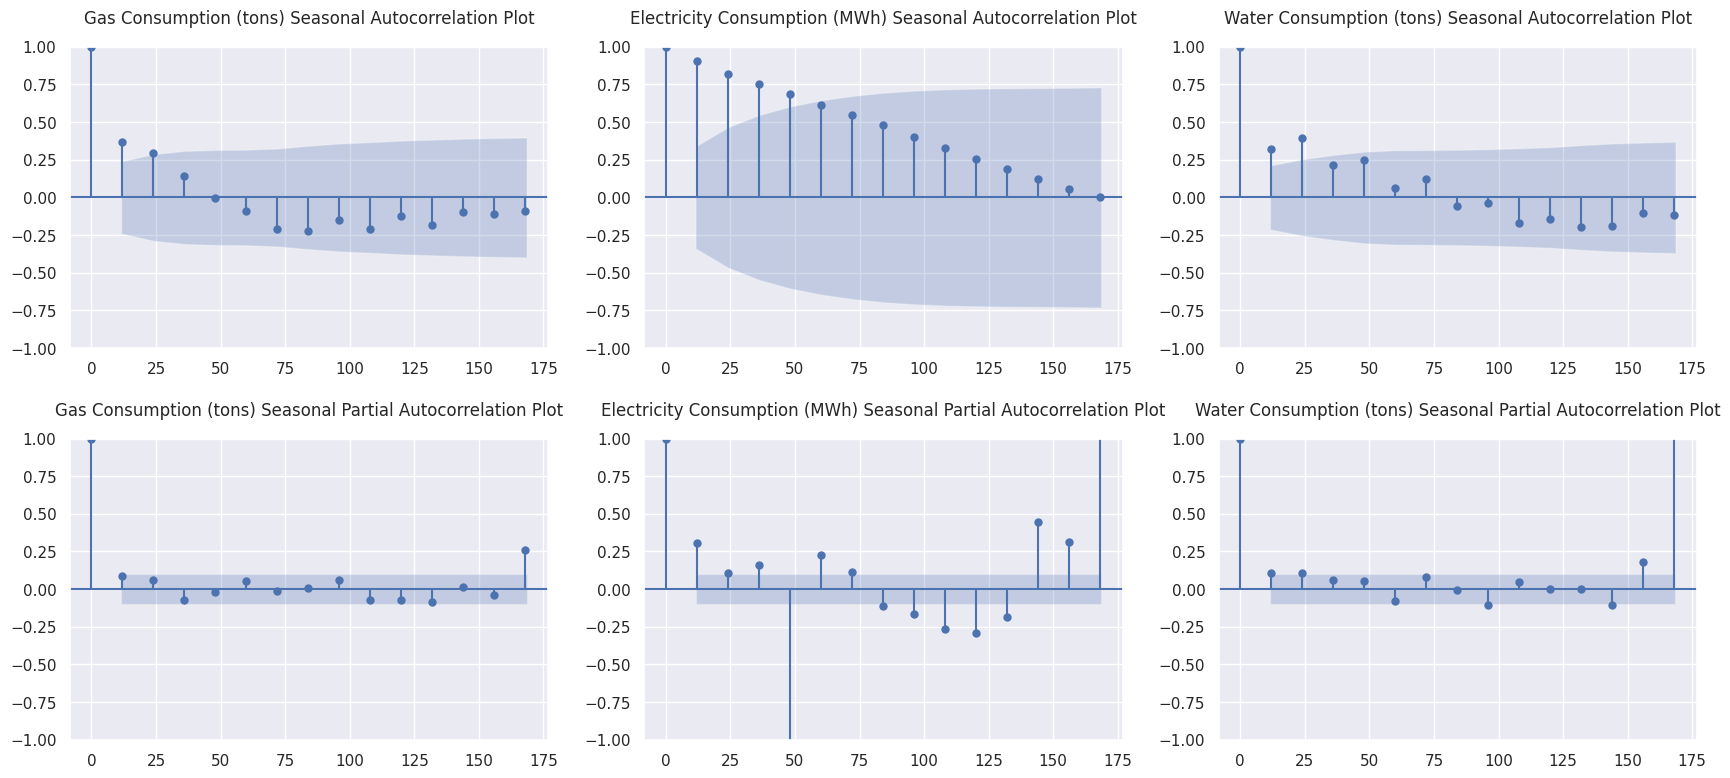

In [28]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3, figsize = (21, 9))
acf_arr = [ax1, ax2, ax3]
pacf_arr = [ax4, ax5, ax6]

for i in range(0,3):
    plot_acf(data[d_col[i]], ax = acf_arr[i], lags = [i * 12 for i in range(15)])
    plot_pacf(data[d_col[i]], ax = pacf_arr[i], lags = [i * 12 for i in range(15)])
    plt.subplots_adjust(hspace = 0.3)
    acf_arr[i].set_title(f"{d_col[i]} Seasonal Autocorrelation Plot", y =1.05)
    pacf_arr[i].set_title(f"{d_col[i]} Seasonal Partial Autocorrelation Plot", y  = 1.05)

<font size = 5>Results of SACF/SPACF Analysis</font>
<br>
- Gas Consumption
  - The ACF and PACF plots tell us that this data is seasonal, and autoregressive. Hence, differencing it once is needed, giving it a d value of *1*. The ACF plot shows constant, oscillating positive autocorrelations, while the PACF shows a big spike at lag 0, then has a sharp tailoff. 
  - We can conclude that the p value should be *2*, and the q value at "0*
<br>
- Electricity Consumption
  - The ACF plot for this feature is inconclusive, but suggests that there should be a AR component. Hence, we take the value of p to be *1*.
  - The PACF for this feature shows a sharp tailoff after lag 12, suggesting that there is a MA component, and that the value of q should also be *1*.
  - The ACF and PACF plots show that there is a strong seasonal component, and that the d value should again, be *1*.
- Water Consumption
  - The ACF plot for this feature shows that there should be a AR component, and given the sharp tailoff at lag 0, the p value should be *0*.
  - The PACF plot shows a sharp tailoff at lag 0, suggesting that the q value should be *0*.


Since we need to find out the order for the ARMA-based models, we shall set some fixed values for the global and seasonal orders.

We can set some of the p, d, q, and s values from insights that we made earlier. For example, since the Electricty Consumption feature is not stationary, it has to be differenced. To do this, we shall set the d value for it as 1, and the rest as 0. In addition, we can also set the s value for all features to 12, since the model appears to repeat on a seasonal basis.

<table style="text-align: center;">
	<tbody>
		<tr style="height: 22px;">
			<td style="height: 22px;">&nbsp;Feature</td>
			<td style="height: 22px;">Global Order&nbsp;</td>
			<td style="height: 22px;">Seasonal Order&nbsp;</td>
		</tr>
		<tr style="height: 22.3515px;">
			<td style="height: 22.3515px;">&nbsp;Gas Consumption</td>
			<td style="height: 22.3515px;">&nbsp;(1,0,2)</td>
			<td style="height: 22.3515px;">&nbsp;(2,1,0,12)</td>
		</tr>
		<tr style="height: 22px;">
			<td style="height: 22px;">Electricity Consumption</td>
			<td style="height: 22px;">(1,1,2)</td>
			<td style="height: 22px;">&nbsp;(1,1,1,12)</td>
		</tr>
		<tr style="height: 22px;">
			<td style="height: 22px;">Water Consumption&nbsp;</td>
			<td style="height: 22px;">&nbsp;(1,0,1)</td>
			<td style="height: 22px;">&nbsp;(0,1,0,12)</td>
		</tr>
	</tbody>
</table>

Now that we have obtained some basic p and q values, we can start modelling with ARIMA.

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          3.869834  1641.055659  1659.865916  0.154962
Electricity Consumption (MWh)  80.849432  3421.332548  3436.368155  0.078044
Water Consumption (tons)       78.719110  3795.976962  3811.025168  0.189390

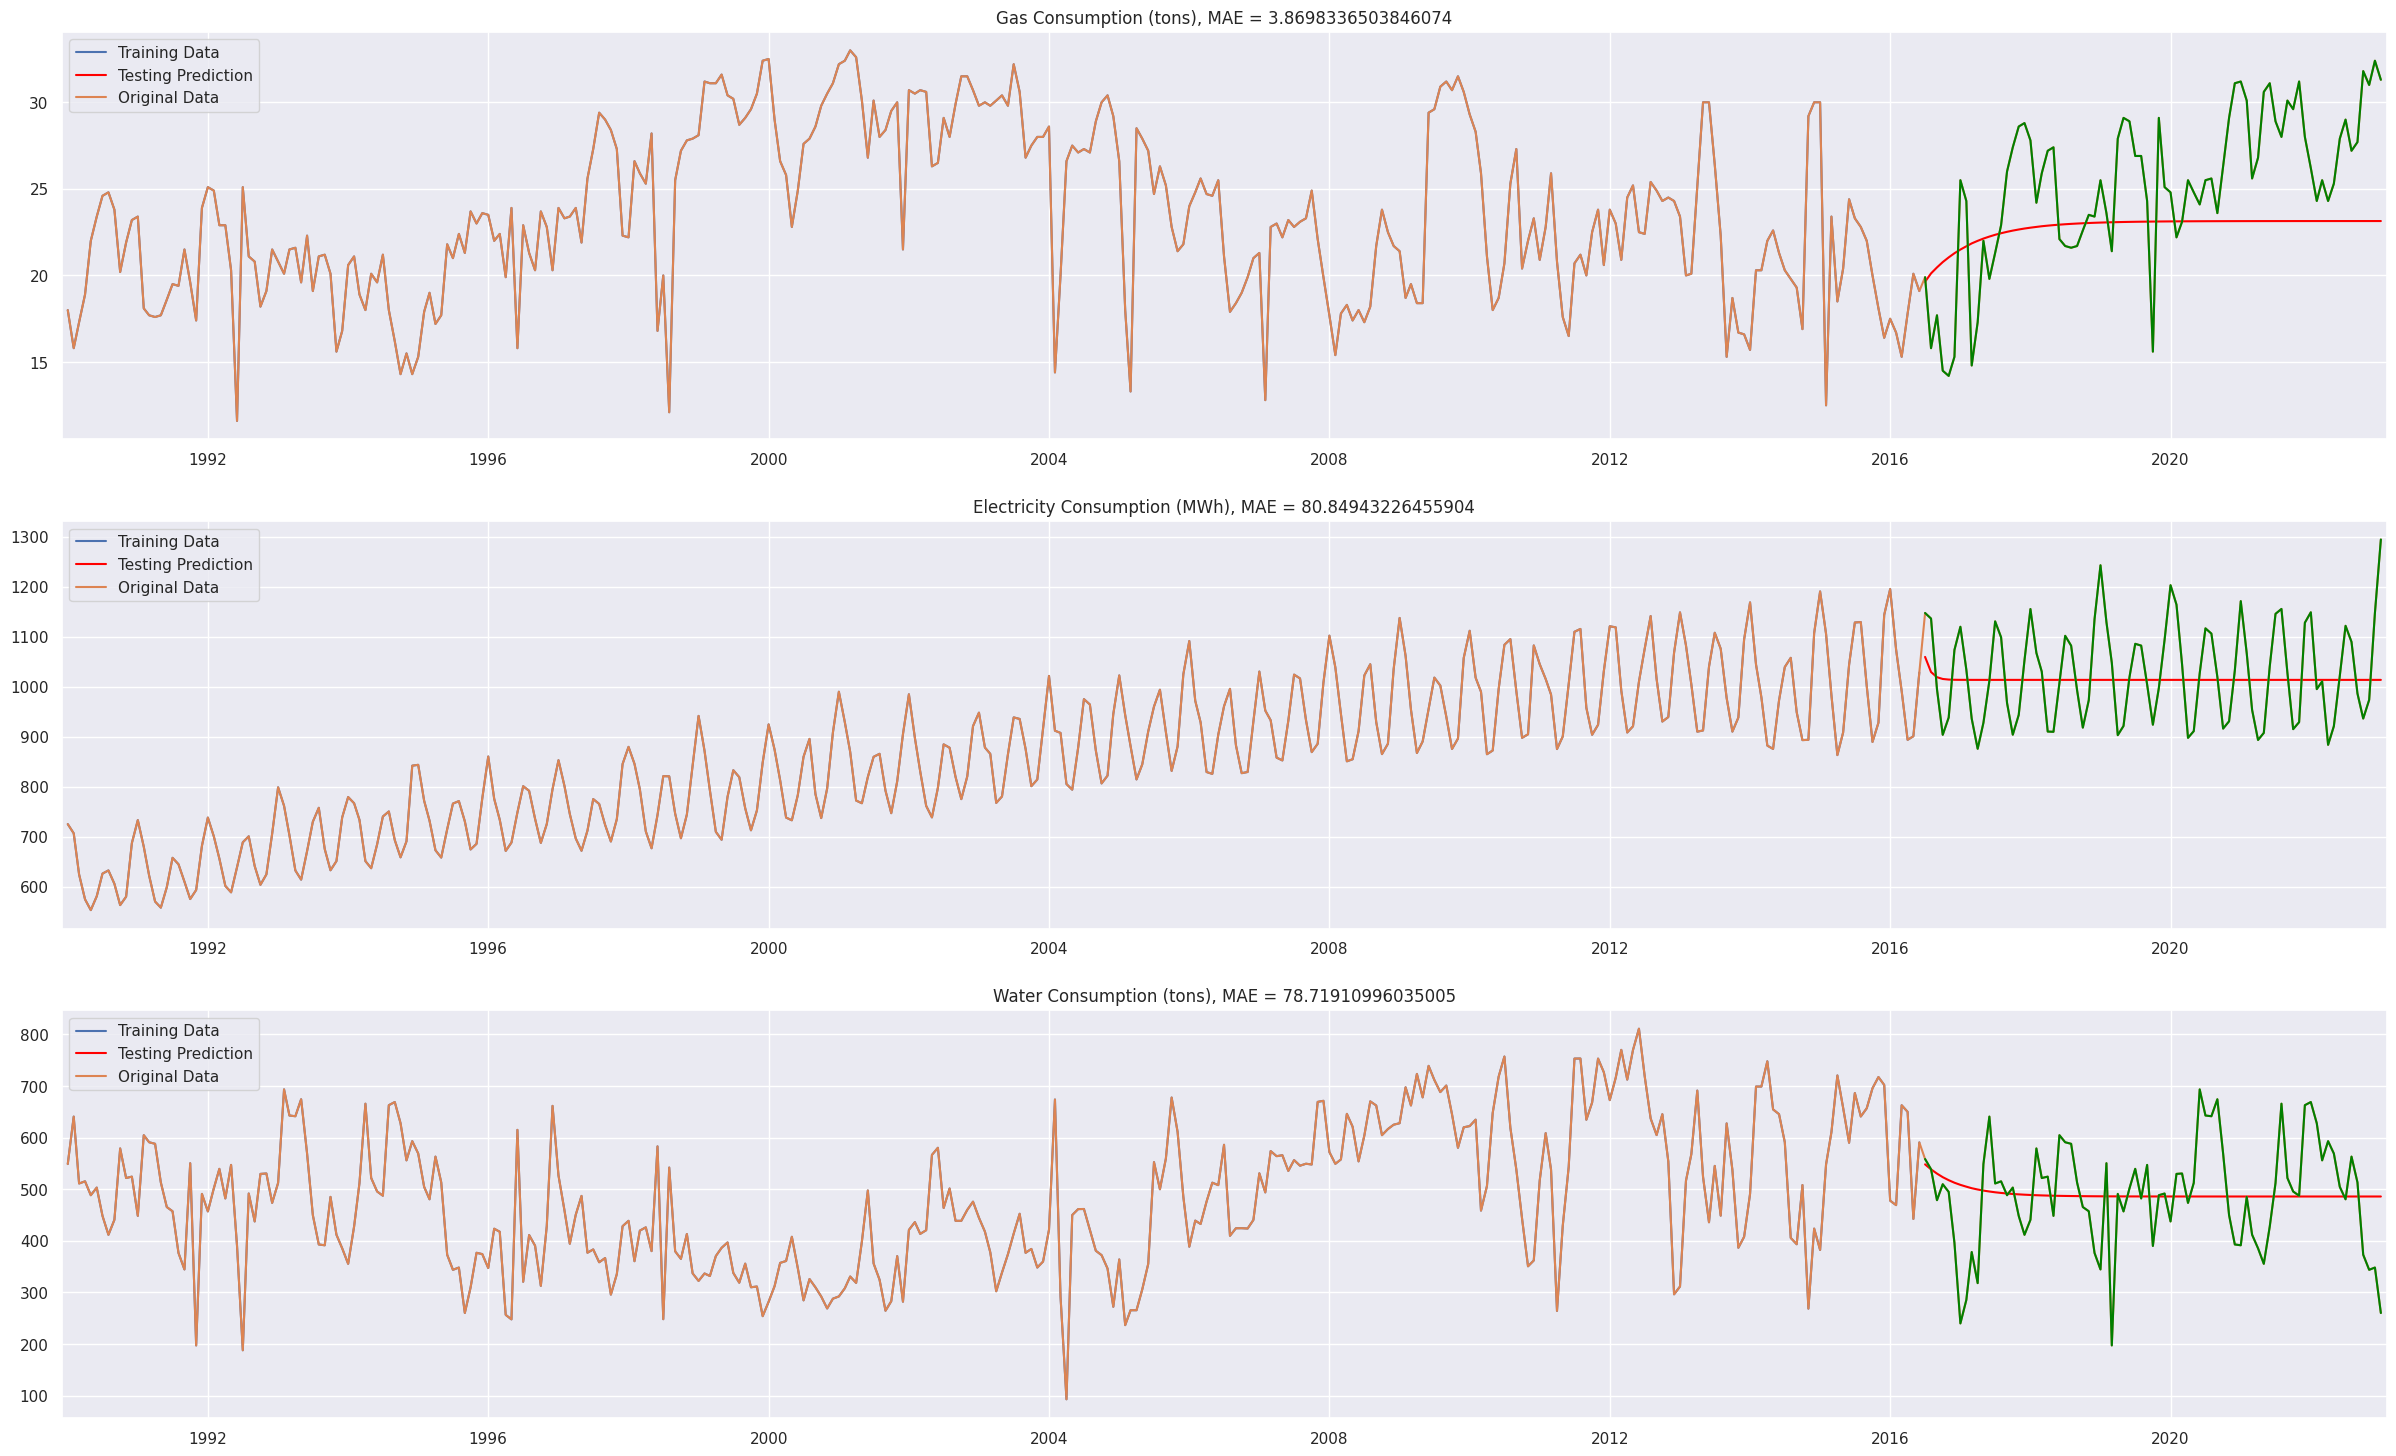

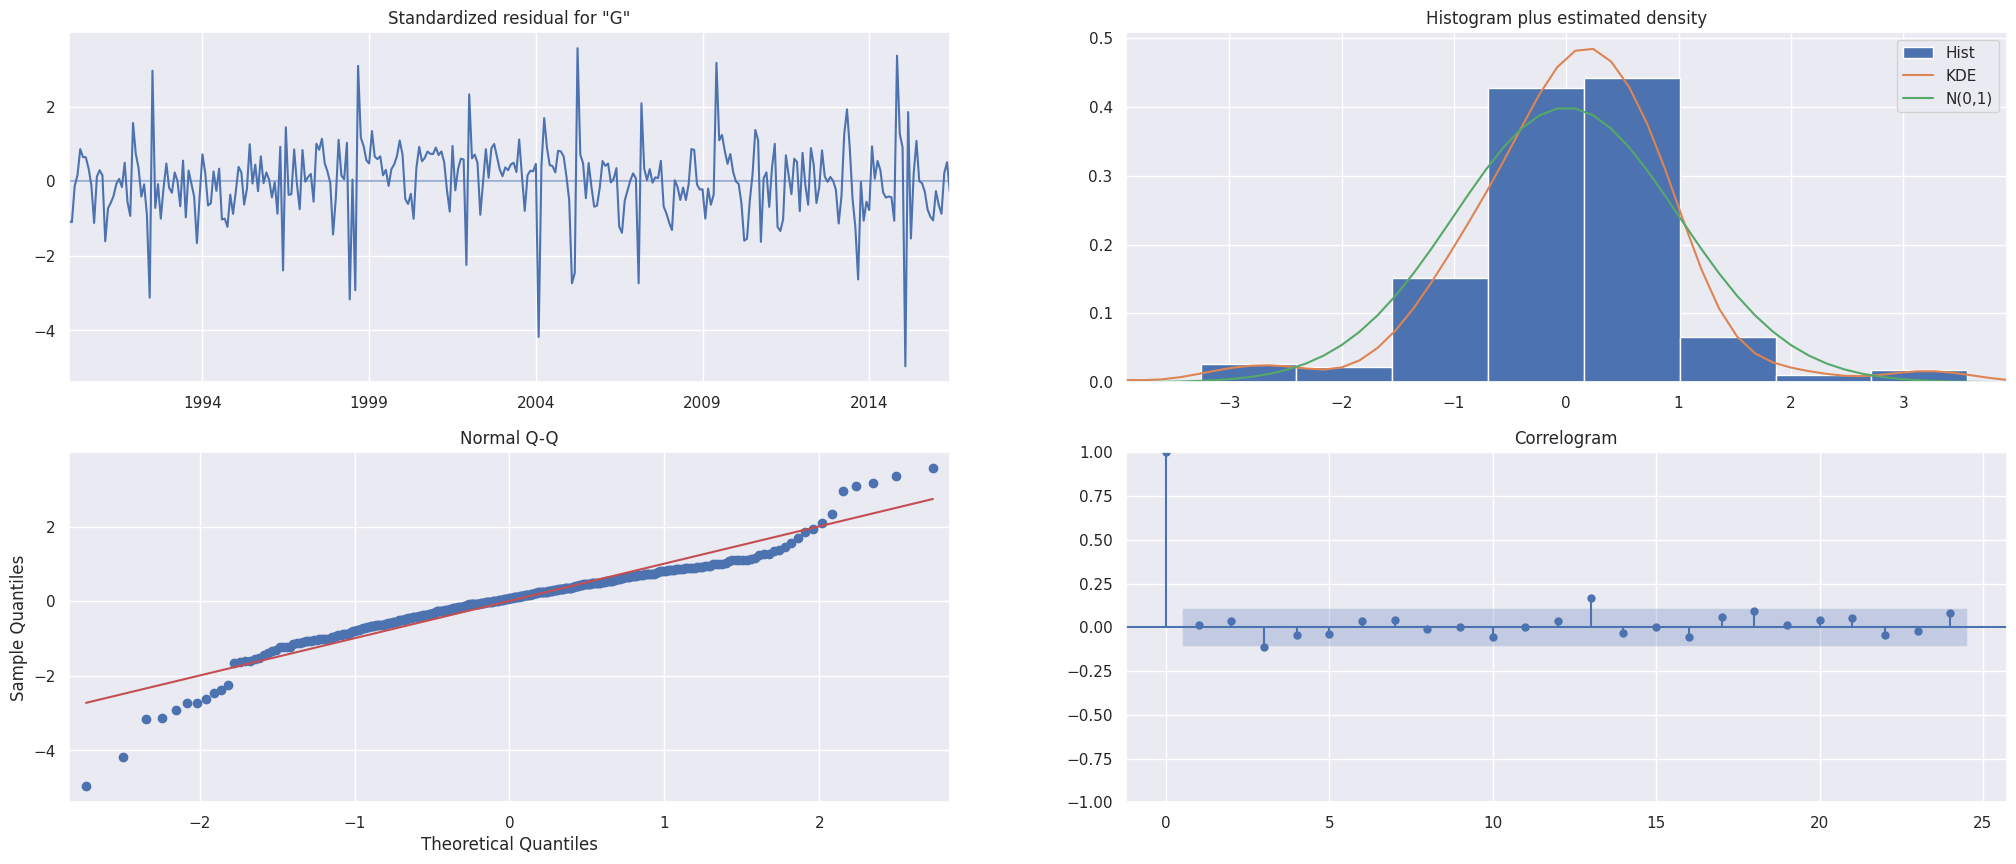

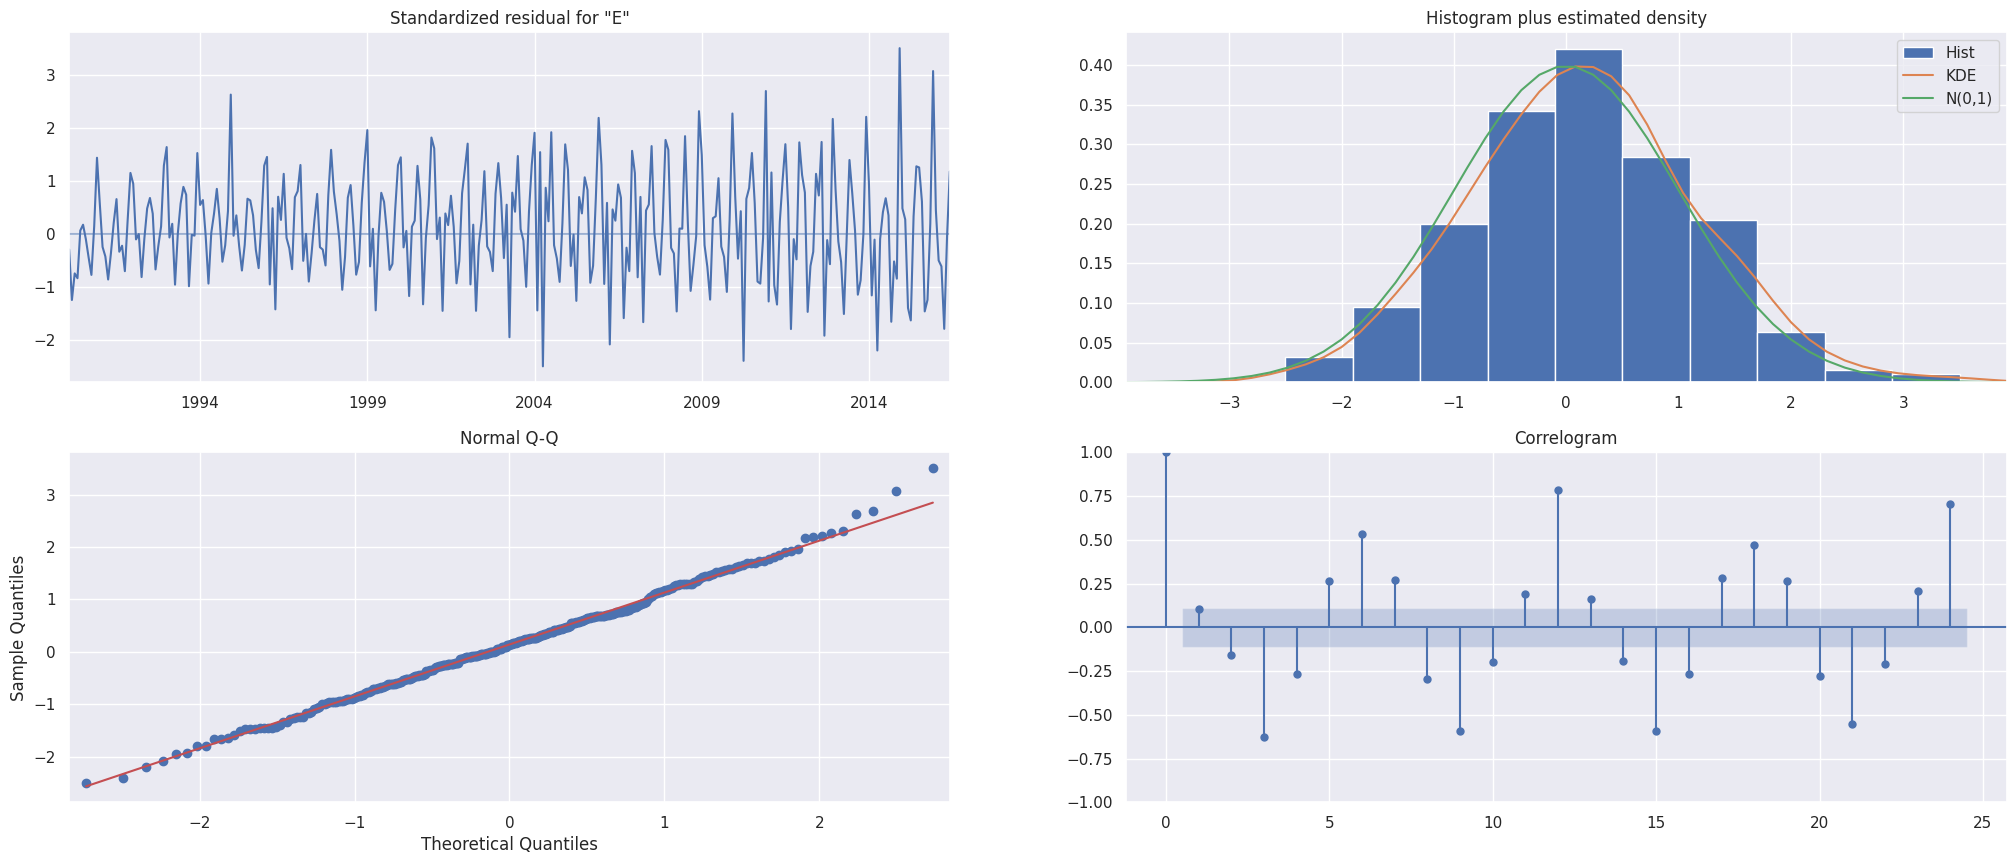

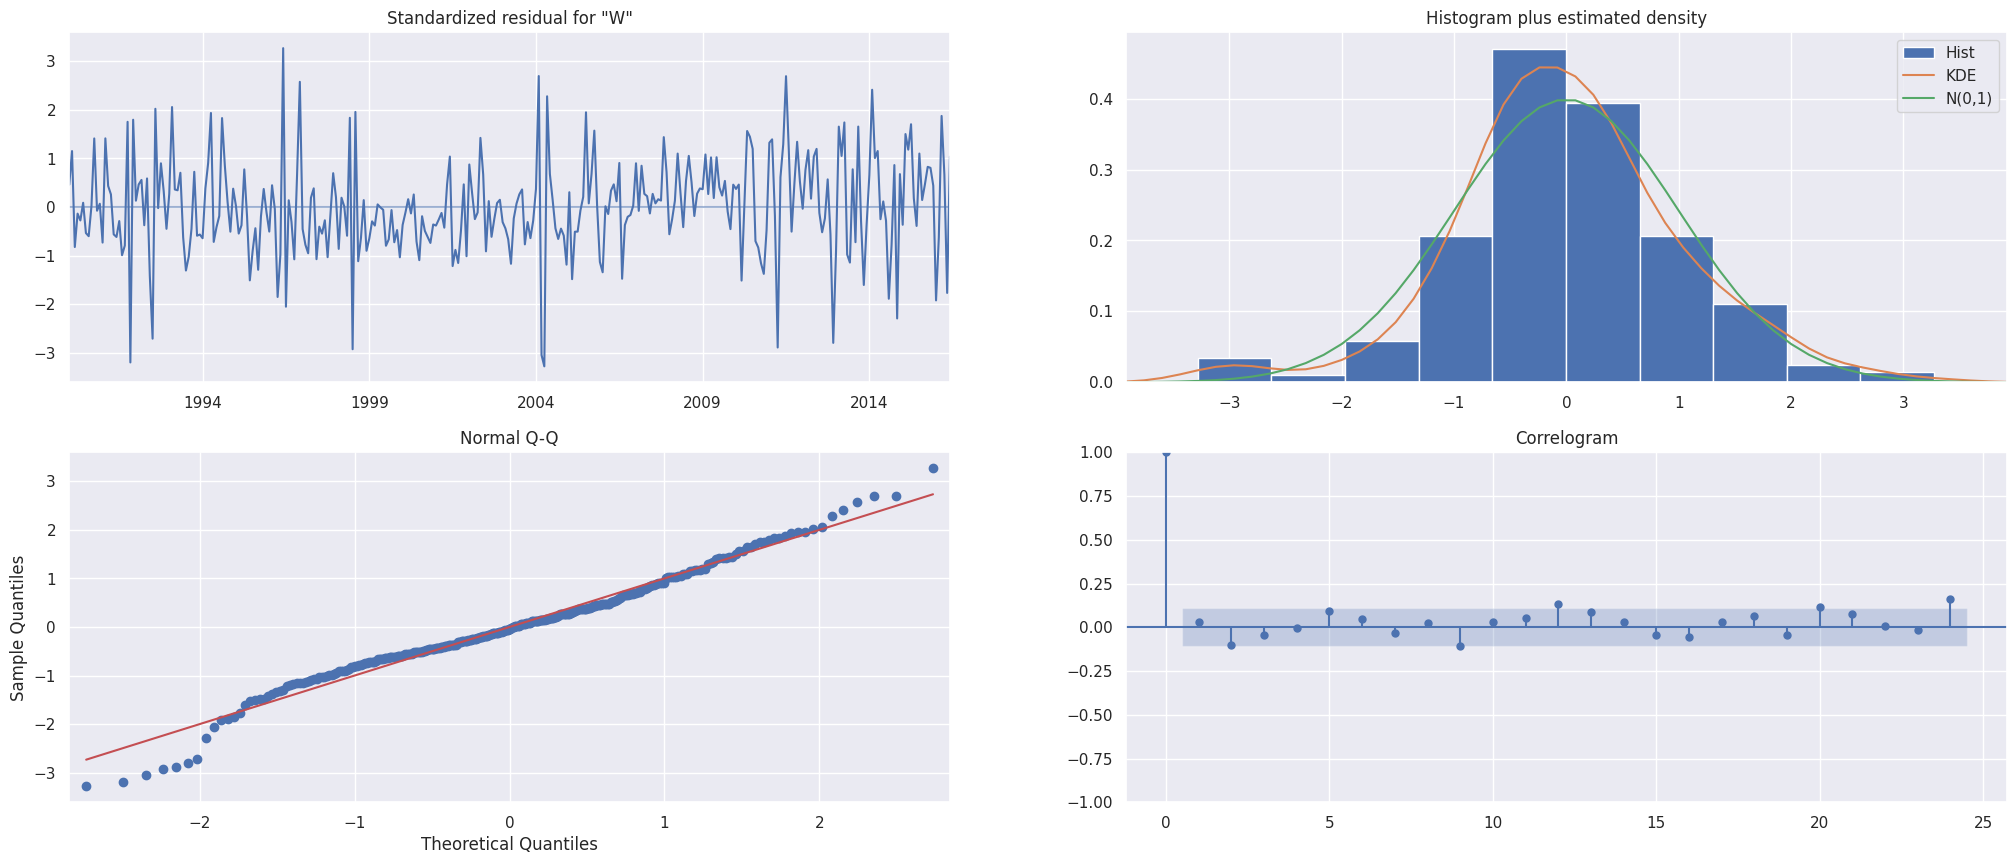

In [29]:
ARIMAModel1 = ARIMA(train_data[d_col[0]], order = (1,0,2), missing = "raise")
ARIMAModel2 = ARIMA(train_data[d_col[1]], order = (1,1,2), missing = "raise")
ARIMAModel3 = ARIMA(train_data[d_col[2]], order = (1,0,1), missing = "raise")

ARIMAArr = [ARIMAModel1, ARIMAModel2, ARIMAModel3]
ARIMADataArr = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
ARIMATrainDataArr = [train_data[d_col[0]], train_data[d_col[1]], train_data[d_col[2]]]
ARIMATestDataArr = [test_data[d_col[0]], test_data[d_col[1]], test_data[d_col[2]]]
ARIMATitleArr = d_col
ARIMAModels, ARIMASummaries, ARIMAPerf = all_feat_vis(ARIMADataArr, ARIMAArr, ARIMATitleArr, train_data = ARIMATrainDataArr, test_data = ARIMATestDataArr, diagnostics = True)

From the prediction graph generated, we can see that the ARIMA model simply follows the mean of the preexisting data. While it gives a low score on the metrics due to this, it is actually quite inaccurate, as it is unable to predict future values according to the peaks and valleys of their consumption.

<font size = 4>Analysis of ARIMA Model Diagnostics</font>
- Gas Consumption
  - We can see from the Q-Q plot, as well as the histogram, that the residuals are not normally distributed, and is left skewed.
  - The correlogram shows a small spike at lag 13.
- Electricity Consumption
  - The residual over time plot seems to show no trend, but the histogram seems to be right skewed, suggesting that the model is not capturing all the variation in the data.
  - Constant spikes in the correlogram shows that the data may still not be stationary, and the d value may need to be increased further.
- Water Consumption
  - The Q-Q plot seems to suggest that the results are not normally distributed.
  - The histogram seems to be right skewed, showing that the residuals are not normally distributed.

Now that we have finished analysis using ARIMA, we shall attempt to resolve the seasonal component using SARIMA.

MAE          AIC          BIC      MAPE
Feature                                                                      
Gas Consumption (tons)           6.157623  1657.982102  1680.323613  0.237028
Electricity Consumption (MWh)   36.313581  2767.016124  2789.337995  0.035619
Water Consumption (tons)       153.054299  3813.193514  3824.364269  0.369345

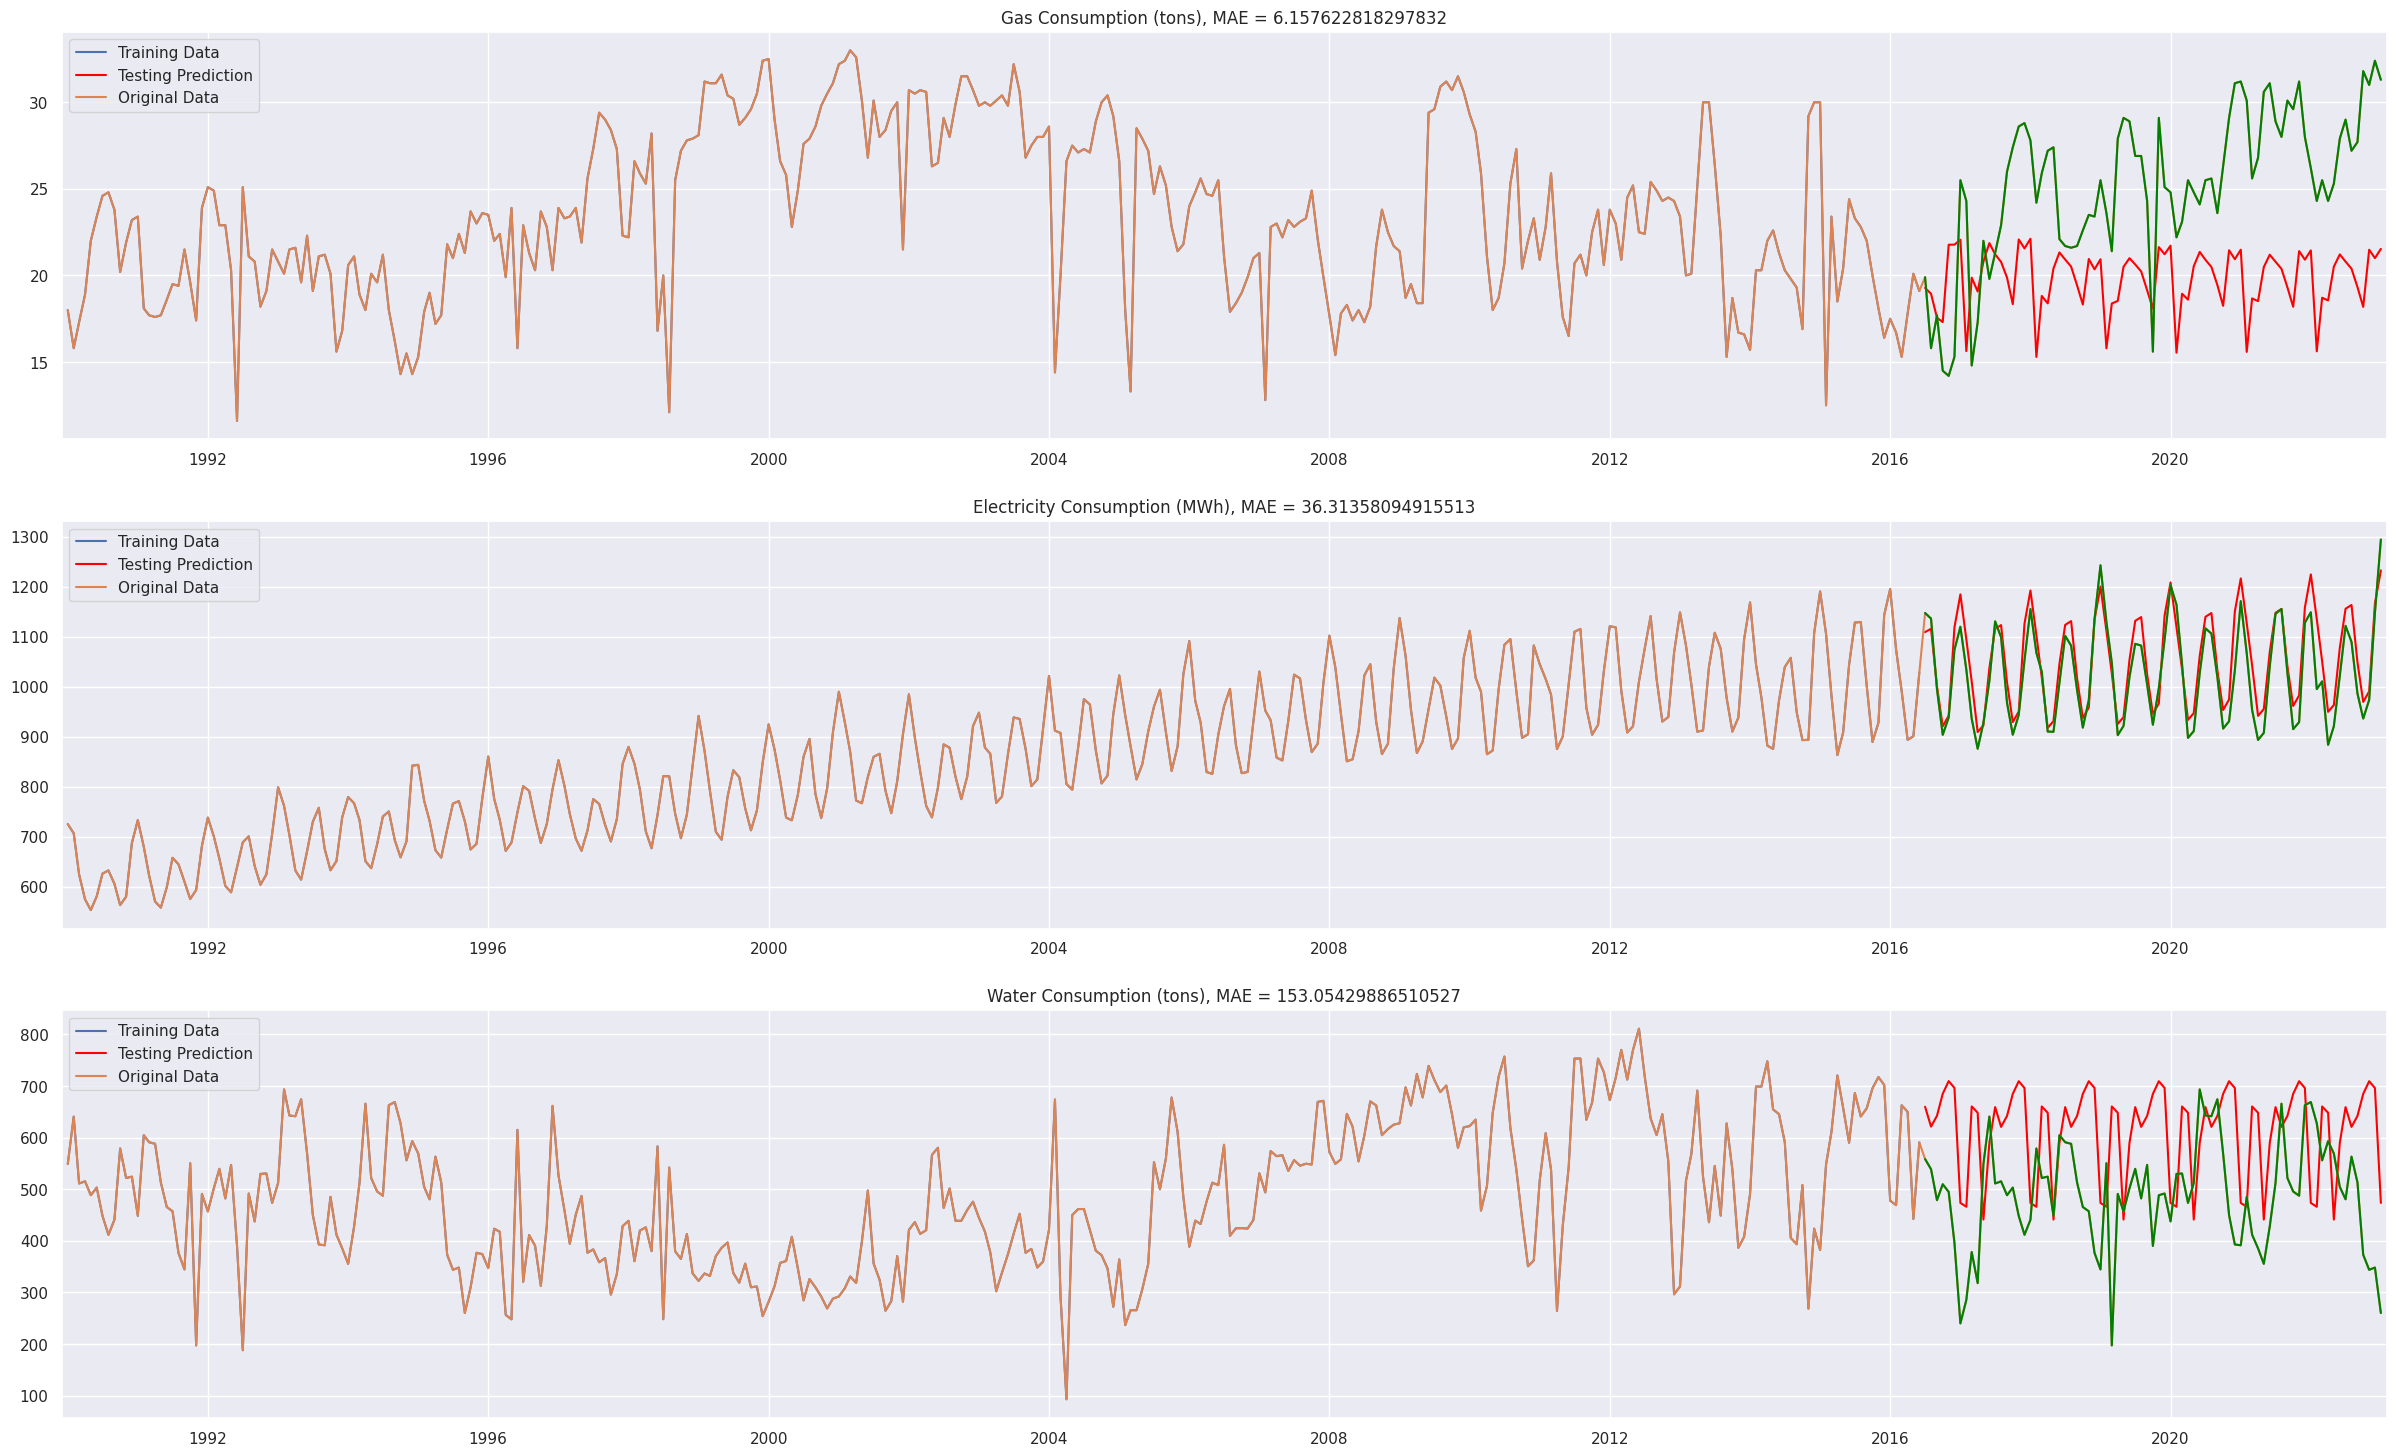

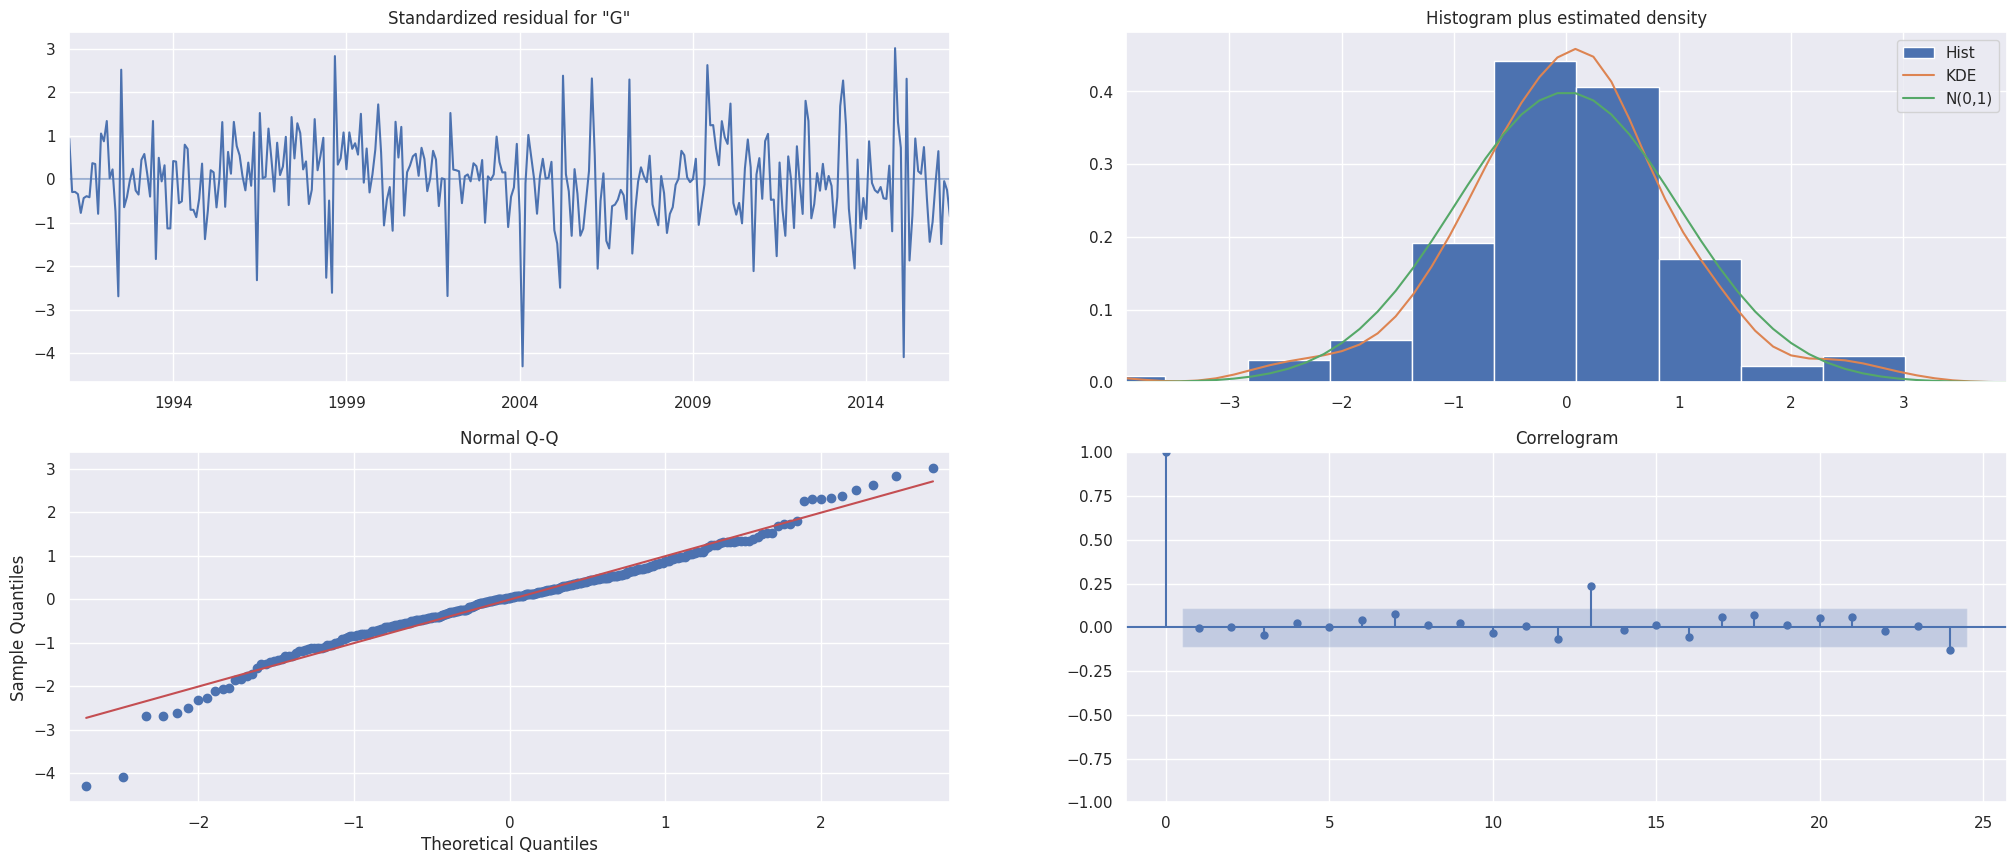

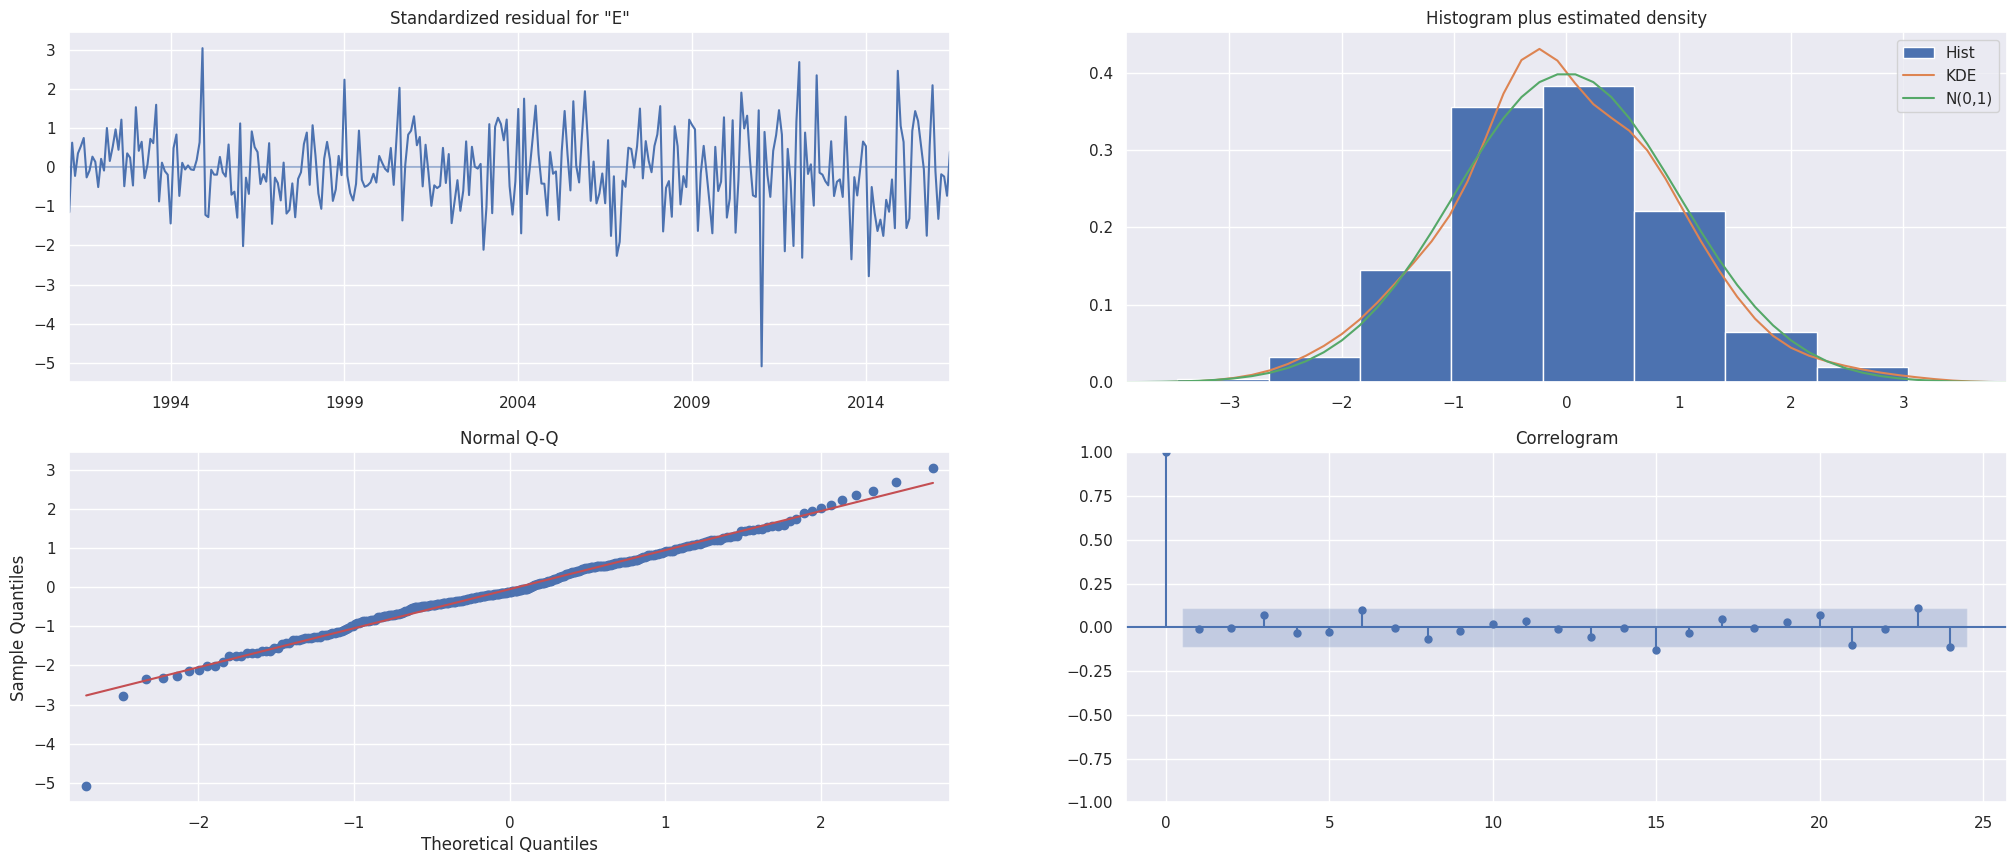

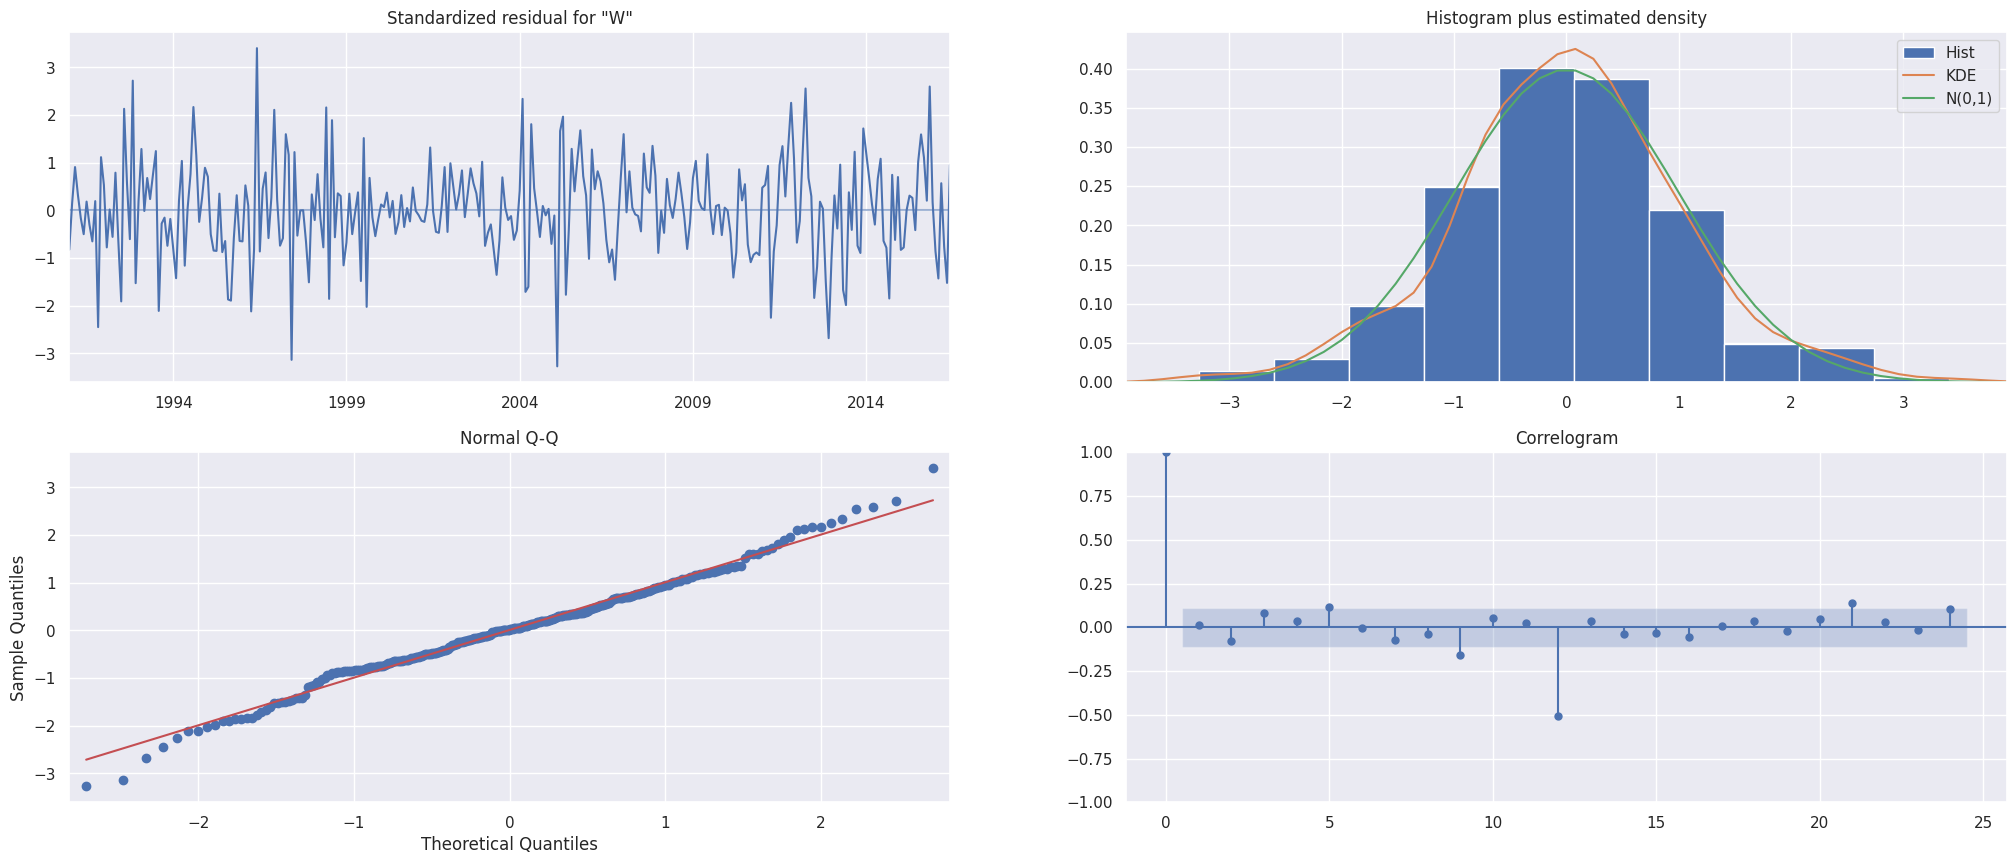

In [30]:
SARIMAXModel1 = SARIMAX(train_data[d_col[0]], order = (1,0,2), seasonal_order= (2, 1, 0, 12), missing = "raise")
SARIMAXModel2 = SARIMAX(train_data[d_col[1]], order = (1,1,2), seasonal_order= (1, 1, 1, 12), missing = "raise")
SARIMAXModel3 = SARIMAX(train_data[d_col[2]], order = (1,0,1), seasonal_order= (0, 1, 0, 12), missing = "raise")

SARIMAXArr = [SARIMAXModel1, SARIMAXModel2, SARIMAXModel3]
SARIMAXDataArr = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
SARIMAXTrainDataArr = [train_data[d_col[0]], train_data[d_col[1]], train_data[d_col[2]]]
SARIMAXTestDataArr = [test_data[d_col[0]], test_data[d_col[1]], test_data[d_col[2]]]
SARIMAXTitleArr = d_col
SARIMAXModels, SARIMAXSummaries, SARIMAXPerf = all_feat_vis(SARIMAXDataArr, SARIMAXArr, SARIMAXTitleArr, train_data = SARIMAXTrainDataArr, test_data = SARIMAXTestDataArr, diagnostics= True)

From the prediction plot, we can see that the SARIMA model attempts to follow the exisitng trend, and does so with acceptable quality. While it may not follow the trends perfectly, and scores rather poorly on metrics relative to ARIMA and Exponential Smoothing, it has room for improvement, hence we shall tune it and see how it improves.

<font size = 4>Analysis of SARIMA Model Diagnostics</font>
- Gas Consumption
  - We can see from the Q-Q plot that the results are not normally distributed.
  - The correlogram shows a spike at lag 13.
- Electricity Consumption
  - The residuals seem to be on a downward trend, suggesting that the model is not capturing all the variation in the data.
  - The residuals also seem to be skewed to the right, suggesting that they are also not normally distributed.
  - The Q-Q plot lines up better compared to gas consumption, but is still not perfect.
- Water Consumption
  - The Q-Q plot seems to suggest that the results are not normally distributed.
  - The correlogram shows a negative spike at lag 12.

Now, we can try to use the VARMAX model.

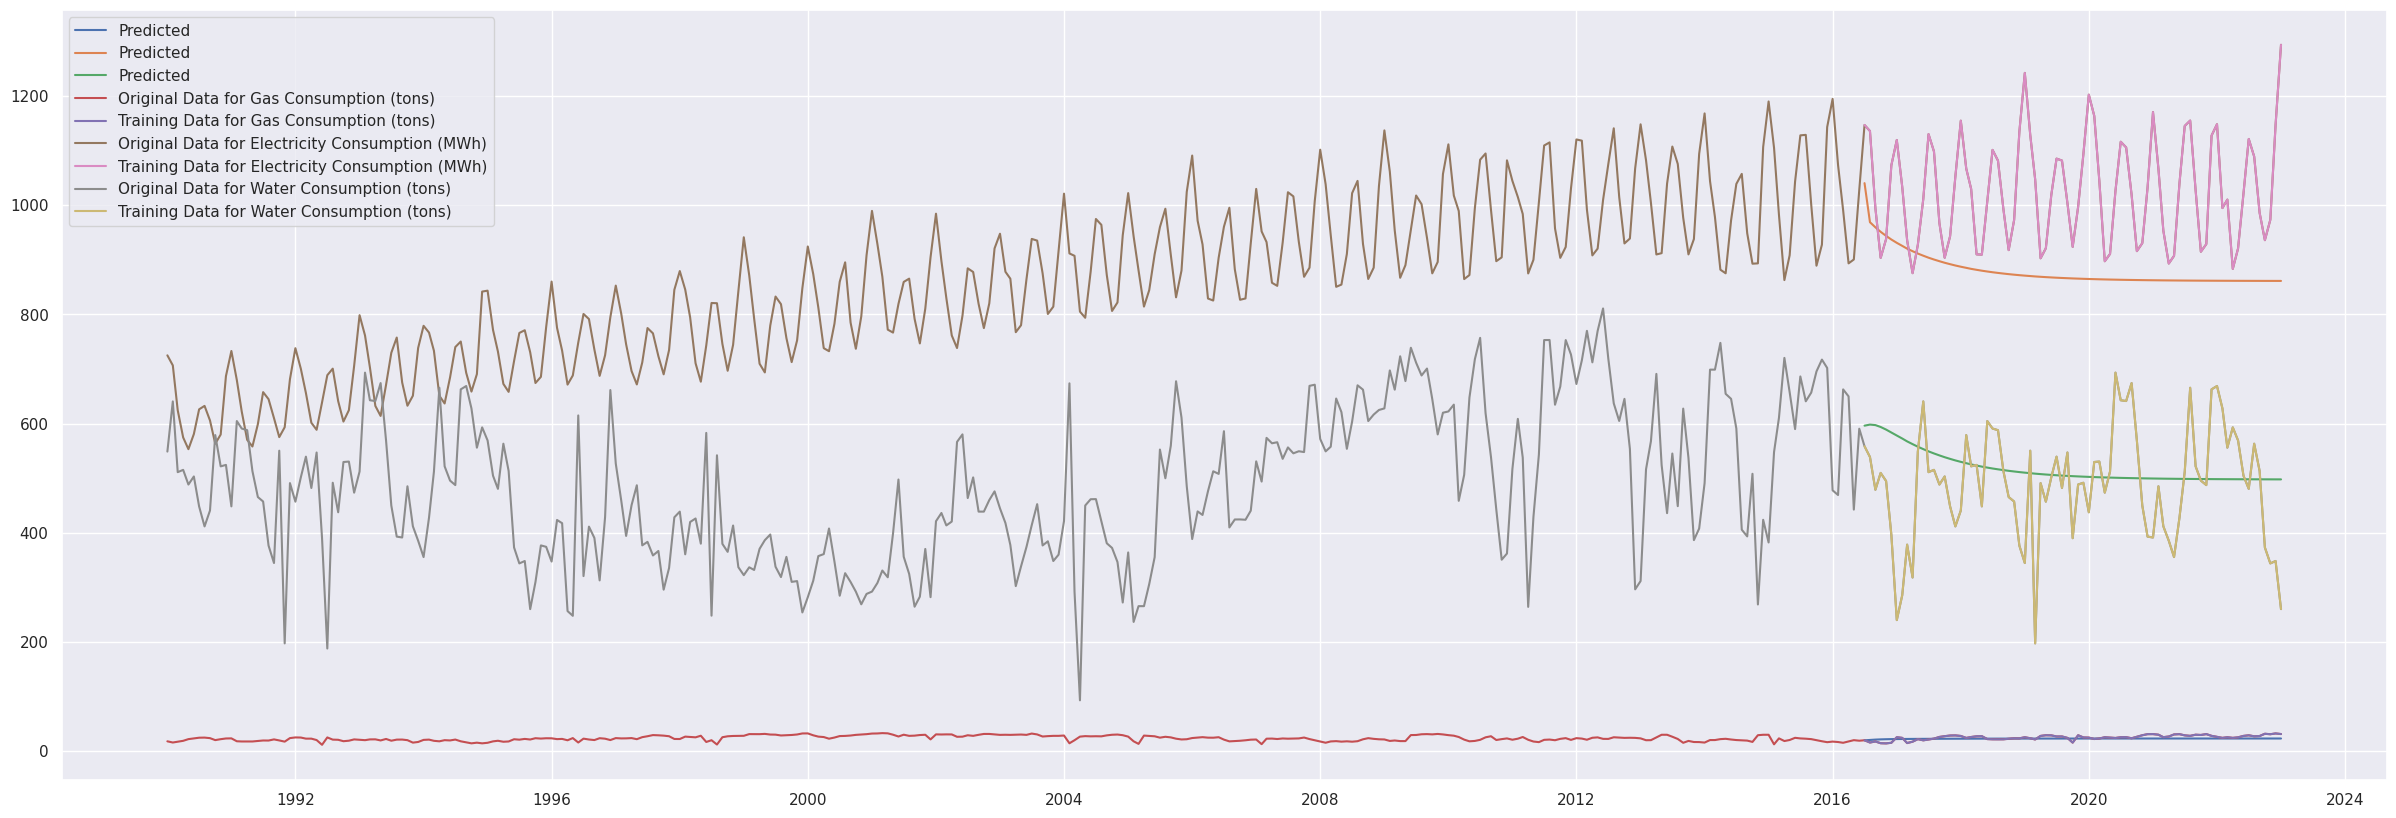

The AIC for the VARMAX model is 8991.811368501614
The BIC for the VARMAX model is 9127.245218281701


In [31]:
ax = plt.figure(figsize = (30,10))

VARMAXModel = VARMAX(train_data, order = (1, 2))
VARMAXPred = VARMAXModel.fit()
VARMAXResult = VARMAXPred.predict(start = test_start[0], end = test_end[0])

plt.plot(VARMAXResult, label = "Predicted")

for og_data, test in zip(data, test_data):
    plt.plot(data[og_data], label = f"Original Data for {og_data}")
    plt.plot(test_data[test], label = f"Training Data for {test}")

plt.legend()
plt.show()

print(f"The AIC for the VARMAX model is {VARMAXPred.aic}")
print(f"The BIC for the VARMAX model is {VARMAXPred.bic}")

The VARMAX model performs extremely poorly compared to the models we trialled earlier, with a AIC of 8991, and a BIC of 9127. Hence, we shall not use it moving forward.

In [32]:
display(expSmoothPerf)
display(ARIMAPerf)
display(SARIMAXPerf)

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          6.254566   768.185525   828.378347  0.240195
Electricity Consumption (MWh)  43.932817  2026.269234  2086.462056  0.043155
Water Consumption (tons)       86.140110  2954.496869  3014.689691  0.218718

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          3.869834  1641.055659  1659.865916  0.154962
Electricity Consumption (MWh)  80.849432  3421.332548  3436.368155  0.078044
Water Consumption (tons)       78.719110  3795.976962  3811.025168  0.189390

MAE          AIC          BIC      MAPE
Feature                                                                      
Gas Consumption (tons)           6.157623  1657.982102  1680.323613  0.237028
Electricity Consumption (MWh)   36.313581  2767.016124  2789.337995  0.035619
Water Consumption (tons)       153.054299  3813.193514  3824.364269  0.369345

Now that we have analysed the base models, we can start attempting to hypertune them to acheive better results. More specifically, we will be hypertuning the ARIMA and SARIMA models, to see if they can perform better than the Holt-Winters Exponential Smoothing model in the end.

<hr>
<font size = 5>Model Improvement</font>
<hr>

We shall start by attempting to find the optimal order for the ARIMA models. The approach will be in the following order
- Optimal order for Gas Consumption
- Optimal order for Electricity Consumption
- Optimal order for Water Consumption

To help us prevent overfitting, and get a more accurate estimate of the model's performance, we shall also use cross-validation. More specifically, we shall use **Expanding Window cross-validation**, instead of methods like Monte-Carlo. The reason for this is that we are training a timeseries model, and it does not make sense to randomly shuffle the datapoints. The method we are using is similar to K-Fold, but the training set is expanded with the test set each fold. The graphic helps to explain how it works.<br>

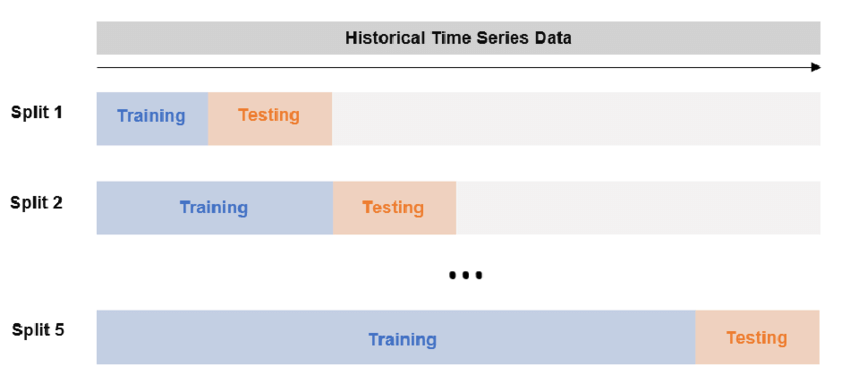

In [33]:
def modelMetricCalc(modResults, order, result):
    combined_df = pd.DataFrame()
    stdModResult = dict(modResults.iloc[1:4].std())
    meanModResult = dict(modResults.iloc[1:4].mean())
    meanModResult["Order"] = str(order)
    std_df = pd.DataFrame(stdModResult, index = [0])
    mean_df = pd.DataFrame(meanModResult, index = [0])
    combined_df = pd.concat([std_df, mean_df], axis=1)
    new_index = ["MAE_std", "AIC_std","BIC_std", "MAPE_std", "MAE", "AIC", "BIC", "MAPE", "Order"]
    combined_df.columns = new_index
    result = result.append(combined_df, ignore_index = True)
    return result
# display(cvModResults.sort_values(by = "MAPE", ascending = True).head(10).style.background_gradient(cmap = "flare"))

In [39]:
def optimalGridSearchCV(param_grid, model, data, test_data, n_folds = 3, seasonalParamGrid = None):
    cvModResults = pd.DataFrame(columns = ["MAE_std", "AIC_std","BIC_std", "MAPE_std", "MAE", "AIC", "BIC", "MAPE", "Order"])
    timeSplit = TimeSeriesSplit(n_splits = n_folds)
    if model == "ARIMA":
        finalResult = pd.DataFrame(columns = ["MAE_std", "AIC_std","BIC_std", "MAPE_std", "MAE", "AIC", "BIC", "MAPE", "Order"])
        for order in tqdm(param_grid):
            modResults = pd.DataFrame(columns = ["MAE", "AIC", "BIC", "MAPE"])
            for train, test in timeSplit.split(data):
                splitTrainData, splitTestData  = data.iloc[train], data.iloc[test]
                currMod = ARIMA(splitTrainData, order = order, missing = "raise")
                currMod.initialize_approximate_diffuse()
                currMod = currMod.fit()
                currentPred = currMod.predict(start = splitTestData.index[0], end = splitTestData.index[-1])
                modMAE = np.mean(np.abs(splitTestData - currentPred))
                modMAPE = np.mean(np.abs(splitTestData - currentPred) / splitTestData)
                modPerfDict = {"AIC": currMod.aic, "BIC": currMod.bic, "MAE":modMAE, "MAPE": modMAPE}
                modResults = modResults.append(modPerfDict, ignore_index = True)    
            currentResult = modelMetricCalc(modResults, order, cvModResults)
            finalResult = finalResult.append(currentResult, ignore_index = True)
    elif model == "SARIMA":
        finalResult = pd.DataFrame(columns = ["MAE_std", "AIC_std","BIC_std", "MAPE_std", "MAE", "AIC", "BIC", "MAPE", "Order"])
        for order in param_grid:
            print(f"Currently calculating order {order}")
            for seasonalOrder in tqdm(seasonalParamGrid):
                combined_df = pd.DataFrame()
                modResults = pd.DataFrame(columns = ["MAE", "AIC", "BIC", "MAPE"])
                for train, test in timeSplit.split(data):
                    splitTrainData, splitTestData  = data.iloc[train], data.iloc[test]
                    currMod = SARIMAX(splitTrainData, order = order, seasonal_order = seasonalOrder, missing = "raise", initialization = "approximate_diffuse")
                    currMod = currMod.fit()
                    currentPred = currMod.predict(start = splitTestData.index[0], end = splitTestData.index[-1])
                    modMAE = np.mean(np.abs(splitTestData - currentPred))
                    modMAPE = np.mean(np.abs(splitTestData - currentPred) / splitTestData)
                    modPerfDict = {"AIC": currMod.aic, "BIC": currMod.bic, "MAE":modMAE, "MAPE": modMAPE}
                    modResults = modResults.append(modPerfDict, ignore_index = True)
                currentResult = modelMetricCalc(modResults, seasonalOrder, cvModResults)
                finalResult = finalResult.append(currentResult, ignore_index = True)
    display(finalResult.sort_values(by = "MAPE", ascending = True).head(10).style.background_gradient(cmap = "flare"))

Attempting to find the optimal order for ARIMA models.
<hr>

In [ ]:
param_grid = tuple((p, d, q) for p in range(10) for d in range(1) for q in range(10))
optimalGridSearchCV(param_grid, "ARIMA", data[d_col[0]], test_data[d_col[0]])

100%|██████████| 100/100 [01:57<00:00,  1.18s/it]


From the above, we can see that the best order to use for the ARIMA model when predicting "Gas Consumption" is (7,0,9). Despite it having a higher AIC and BIC score, it is not the highest in the dataset, while having the lowest MAE and MAPE scores. Similarly, the standard deviation for AIC and BIC are the lowest, indicating that the model is reliable and stable.

In [ ]:
param_grid = tuple((p, d, q) for p in range(10) for d in range(1,2) for q in range(10))
optimalGridSearchCV(param_grid, "ARIMA", data[d_col[1]], test_data[d_col[1]])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:56<00:00,  1.17s/it]


From the above, we can see that the order (9,1,6) is the best for the ARIMA model when predicting "Electricity Consumption". This is as while the AIC, BIC, MAPE, and MAE may not be the best, it has a much lower standard deviation on the AIC and BIC metrics. This means that the model is more reliable as compared to other models.

In [ ]:
param_grid = tuple((p, d, q) for p in range(10) for d in range(1) for q in range(10))
optimalGridSearchCV(param_grid, "ARIMA", data[d_col[2]], test_data[d_col[2]])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:57<00:00,  1.18s/it]


From the table generated above, we can see that the order (7,0,2) is the best for the ARIMA model when attempting to predict "Water Consumption". While the AIC and BIC score may be quite high compared to the results obtained from other models, it still has the lowest MAE, and a average MAPE (only 0.4% worse than the best order). In addiiton, the order is also relatively stable, with a slightly below average standard deviation in the AIC and BIC scores.

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          5.110653  1639.449962  1707.166886  0.197939
Electricity Consumption (MWh)  29.979521  3014.484804  3074.627233  0.028497
Water Consumption (tons)       85.998057  3790.808832  3832.191398  0.218222

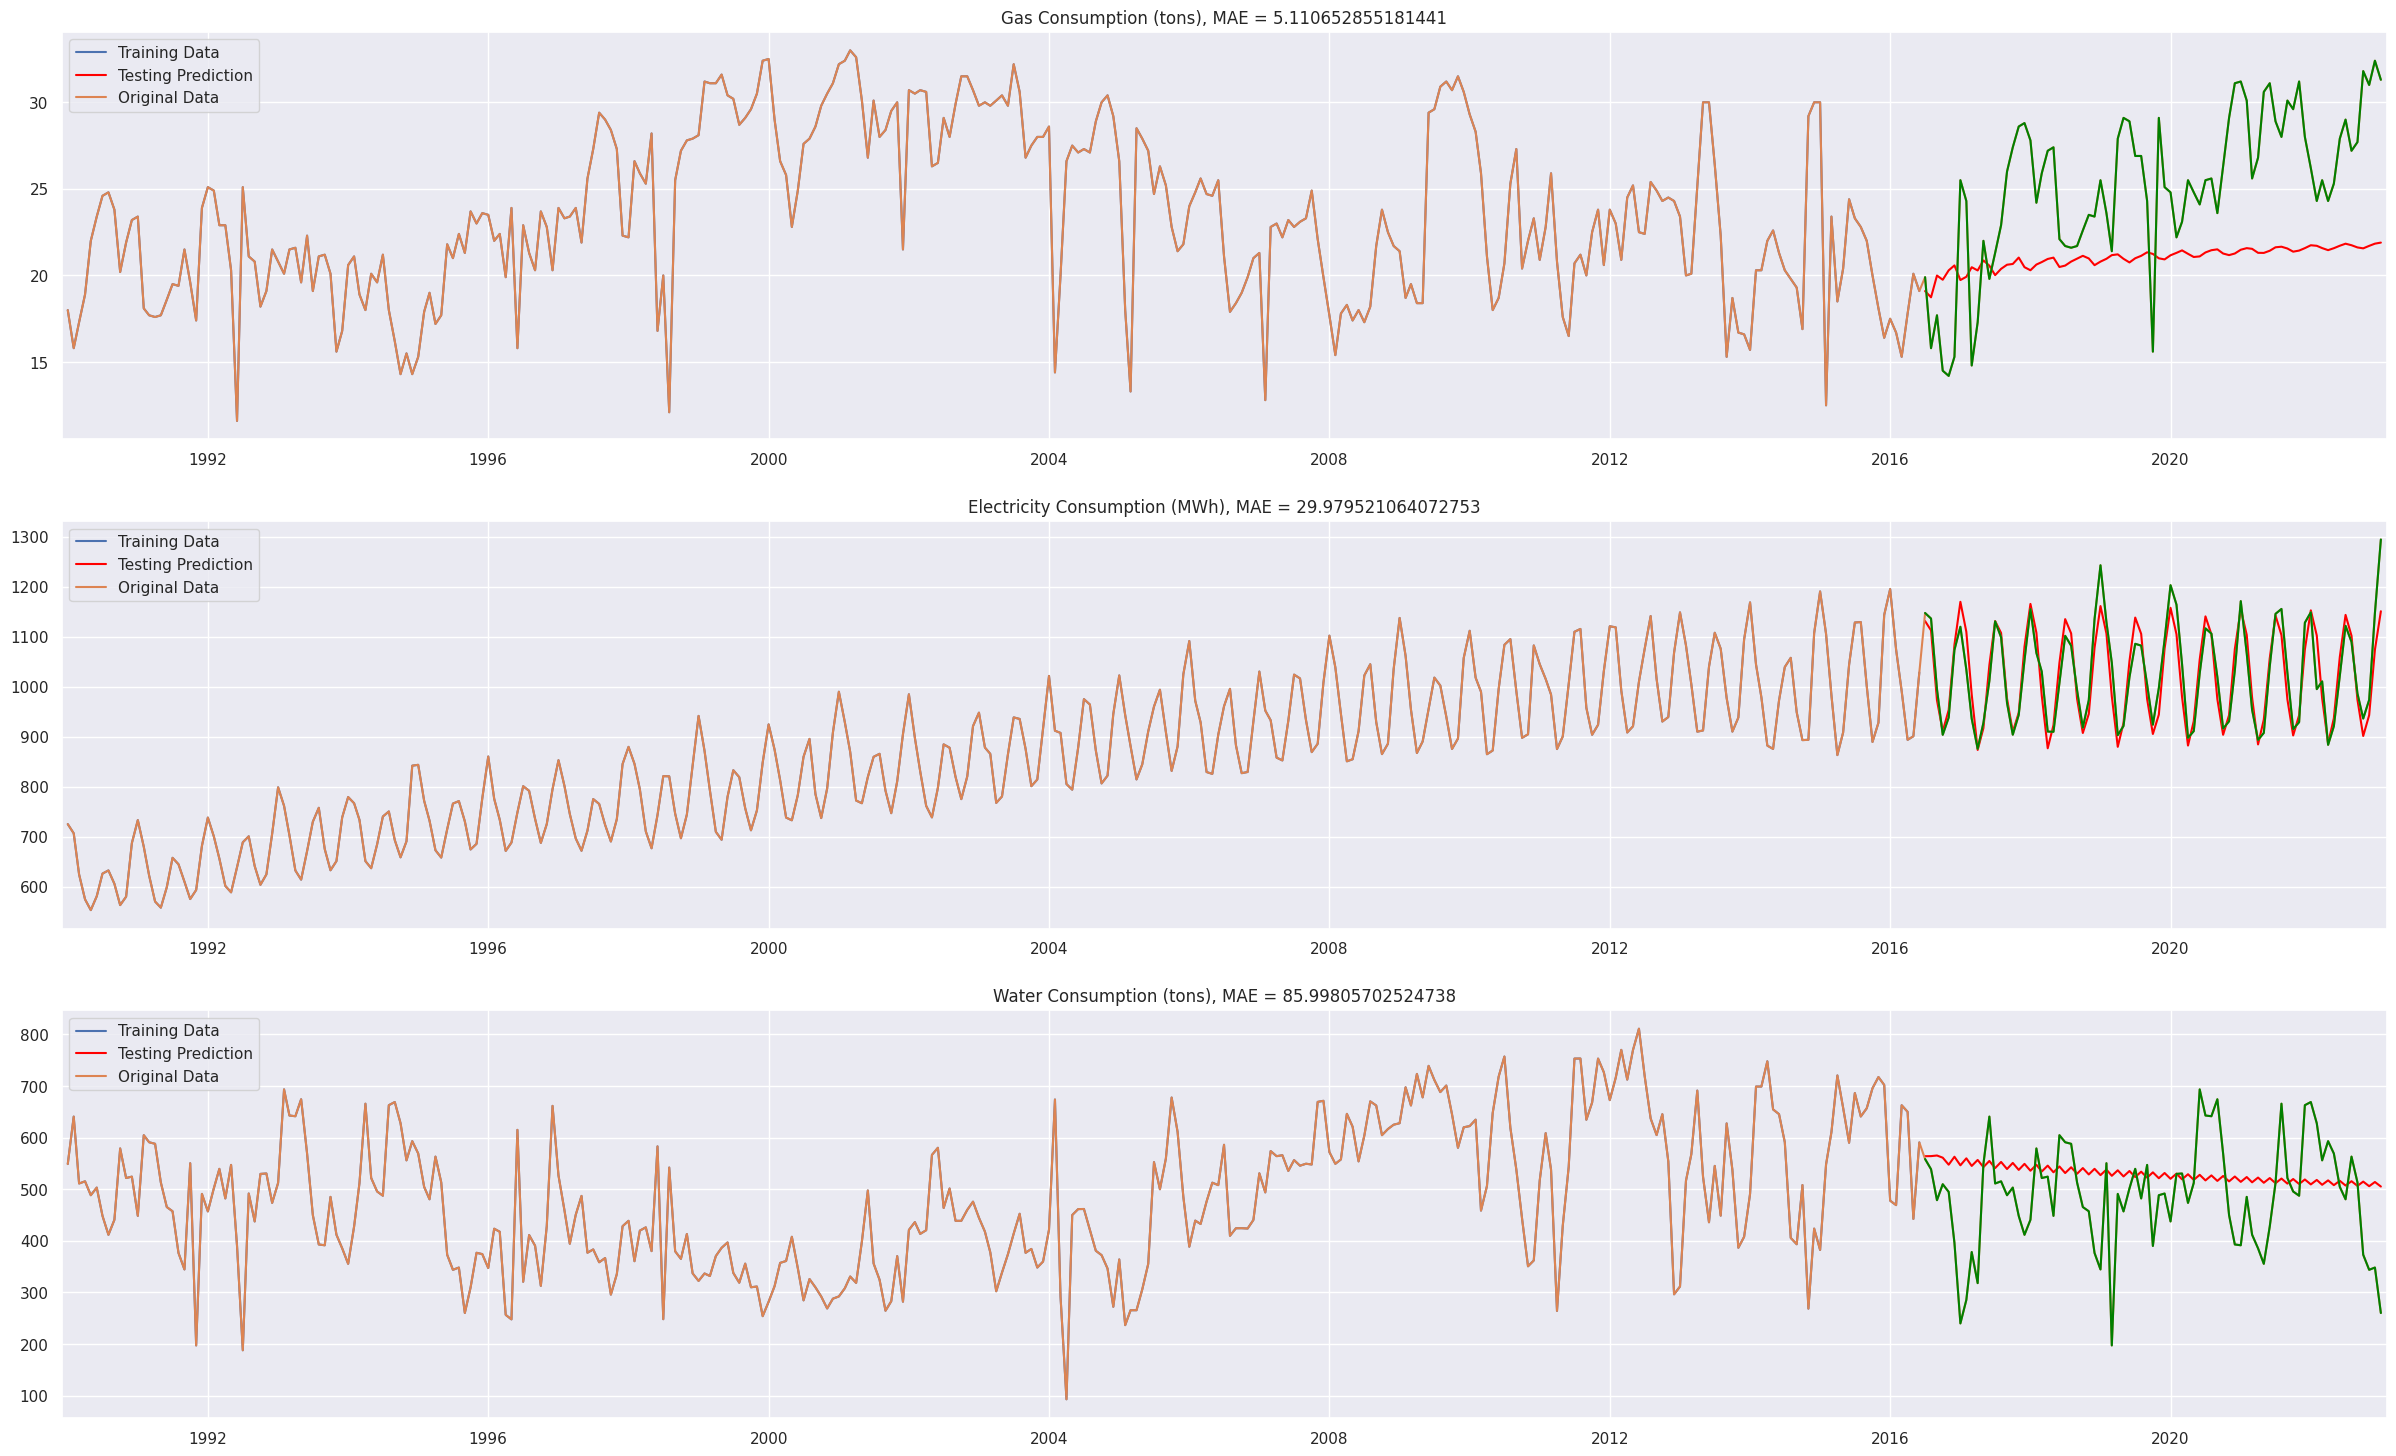

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [ ]:
TunedARIMAModel1 = ARIMA(train_data[d_col[0]], order = (7,0,9), missing = "raise")
TunedARIMAModel2 = ARIMA(train_data[d_col[1]], order = (9,1,6), missing = "raise")
TunedARIMAModel3 = ARIMA(train_data[d_col[2]], order = (7,0,2), missing = "raise")

TunedARIMAArr = [TunedARIMAModel1, TunedARIMAModel2, TunedARIMAModel3]
TunedARIMADataArr = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
TunedARIMATrainDataArr = [train_data[d_col[0]], train_data[d_col[1]], train_data[d_col[2]]]
TunedARIMATestDataArr = [test_data[d_col[0]], test_data[d_col[1]], test_data[d_col[2]]]
TunedARIMATitleArr = d_col
TunedARIMAModels, TunedARIMASummaries, TunedARIMAPerf = all_feat_vis(TunedARIMADataArr, TunedARIMAArr, TunedARIMATitleArr, train_data = TunedARIMATrainDataArr, test_data = TunedARIMATestDataArr, diagnostics = False)

The graphs generated show a improved attempt at following the trends compared to it's untuned version, but could still use some improvement. It follows the trend for electricity consumption quite well, but still predicts near the mean for Water and Gas Consumption.

Attempting to find the optimal order for SARIMA models.
<hr>


Given that we have found the optimal global order earlier, we shall just reuse them, and find P and Q for the seasonal order.

In [40]:
param_grid = tuple((p,d,q) for p in range(10) for d in range(1) for q in range(10))
seasonal_param_grid = tuple((p, d, q, 12) for p in range(10) for d in range(1) for q in range(10))
optimalGridSearchCV(param_grid, "SARIMA", data[d_col[0]], test_data[d_col[0]], seasonalParamGrid = seasonal_param_grid)

Currently calculating order (0, 0, 0)


  1%|          | 1/100 [00:00<00:09,  9.97it/s]

100%|██████████| 100/100 [41:16<00:00, 24.77s/it]


Currently calculating order (0, 0, 1)


100%|██████████| 100/100 [57:14<00:00, 34.34s/it]


Currently calculating order (0, 0, 2)


 84%|████████▍ | 84/100 [41:55<07:59, 29.95s/it]


KeyboardInterrupt: 

From the above, we can see that the best seasonal for the SARIMA model predicting "Gas Consumption" is (1,0,3,12). Not only does the model have the lowest MAE and MAPE scores, it also has one of the lowest standard deviations for all scoring metrics. This order results in the model not only being accurate, but also stable.

In [ ]:
param_grid = tuple((p,d,q) for p in range(9,10) for d in range(2,3) for q in range(6,7))
seasonal_param_grid = tuple((p, d, q, 12) for p in range(5) for d in range(1,2) for q in range(5))
optimalGridSearchCV(param_grid, "SARIMA", data[d_col[1]], test_data[d_col[1]], seasonalParamGrid = seasonal_param_grid)

  0%|          | 0/1 [00:00<?, ?it/s]

Currently calculating order (0, 1, 0, 12)


Currently calculating order (0, 1, 1, 12)


Currently calculating order (0, 1, 2, 12)


Currently calculating order (0, 1, 3, 12)


Currently calculating order (0, 1, 4, 12)


Currently calculating order (1, 1, 0, 12)


Currently calculating order (1, 1, 1, 12)


Currently calculating order (1, 1, 2, 12)


Currently calculating order (1, 1, 3, 12)


Currently calculating order (1, 1, 4, 12)


Currently calculating order (2, 1, 0, 12)


Currently calculating order (2, 1, 1, 12)


Currently calculating order (2, 1, 2, 12)


Currently calculating order (2, 1, 3, 12)


Currently calculating order (2, 1, 4, 12)


Currently calculating order (3, 1, 0, 12)


Currently calculating order (3, 1, 1, 12)


Currently calculating order (3, 1, 2, 12)


Currently calculating order (3, 1, 3, 12)


Currently calculating order (3, 1, 4, 12)


Currently calculating order (4, 1, 0, 12)


Currently calculating order (4, 1, 1, 12)


Currently calculating order (4, 1, 2, 12)


Currently calculating order (4, 1, 3, 12)


Currently calculating order (4, 1, 4, 12)


100%|██████████| 1/1 [12:36<00:00, 756.78s/it]


From the above, we can see that the order (2,1,4,12) is the best order to use for a SARIMA model attempting to predict electricity consumption. While the AIC and BIC, along with it's standard deviation, may be higher compared to other models, it's MAE and MAPE is lower compared to other models.

In [ ]:
param_grid = tuple((p,d,q) for p in range(7,8) for d in range(1) for q in range(2,3))
seasonal_param_grid = tuple((p, d, q, 12) for p in range(5) for d in range(1) for q in range(5))
optimalGridSearchCV(param_grid, "SARIMA", data[d_col[2]], test_data[d_col[2]], seasonalParamGrid = seasonal_param_grid)

  0%|          | 0/1 [00:00<?, ?it/s]

Currently calculating order (0, 0, 0, 12)


Currently calculating order (0, 0, 1, 12)


Currently calculating order (0, 0, 2, 12)


Currently calculating order (0, 0, 3, 12)


Currently calculating order (0, 0, 4, 12)


Currently calculating order (1, 0, 0, 12)


Currently calculating order (1, 0, 1, 12)


Currently calculating order (1, 0, 2, 12)


Currently calculating order (1, 0, 3, 12)


Currently calculating order (1, 0, 4, 12)


Currently calculating order (2, 0, 0, 12)


Currently calculating order (2, 0, 1, 12)


Currently calculating order (2, 0, 2, 12)


Currently calculating order (2, 0, 3, 12)


Currently calculating order (2, 0, 4, 12)


Currently calculating order (3, 0, 0, 12)


Currently calculating order (3, 0, 1, 12)


Currently calculating order (3, 0, 2, 12)


Currently calculating order (3, 0, 3, 12)


Currently calculating order (3, 0, 4, 12)


Currently calculating order (4, 0, 0, 12)


Currently calculating order (4, 0, 1, 12)


Currently calculating order (4, 0, 2, 12)


Currently calculating order (4, 0, 3, 12)


Currently calculating order (4, 0, 4, 12)


100%|██████████| 1/1 [05:09<00:00, 309.40s/it]


From the above, we can see that the best order to use for the SARIMA model attempting to predict water consumption is (0,0,4,12). While it's AIC and BIC scores are qite high, showing that the model is quite complex. Despite this, it has a low standard deviation on those metrics, showing that the model is quite stable. In additon, it's MAE and MAPE are also significantly lower as compared to the other models, proving that it is one of the better, if not the best order to use.

MAE          AIC          BIC      MAPE
Feature                                                                      
Gas Consumption (tons)           6.912245  1651.112869  1730.115948  0.263887
Electricity Consumption (MWh)   65.032224  2782.180418  2864.027277  0.064082
Water Consumption (tons)       156.589583  3919.231539  3971.900259  0.333677

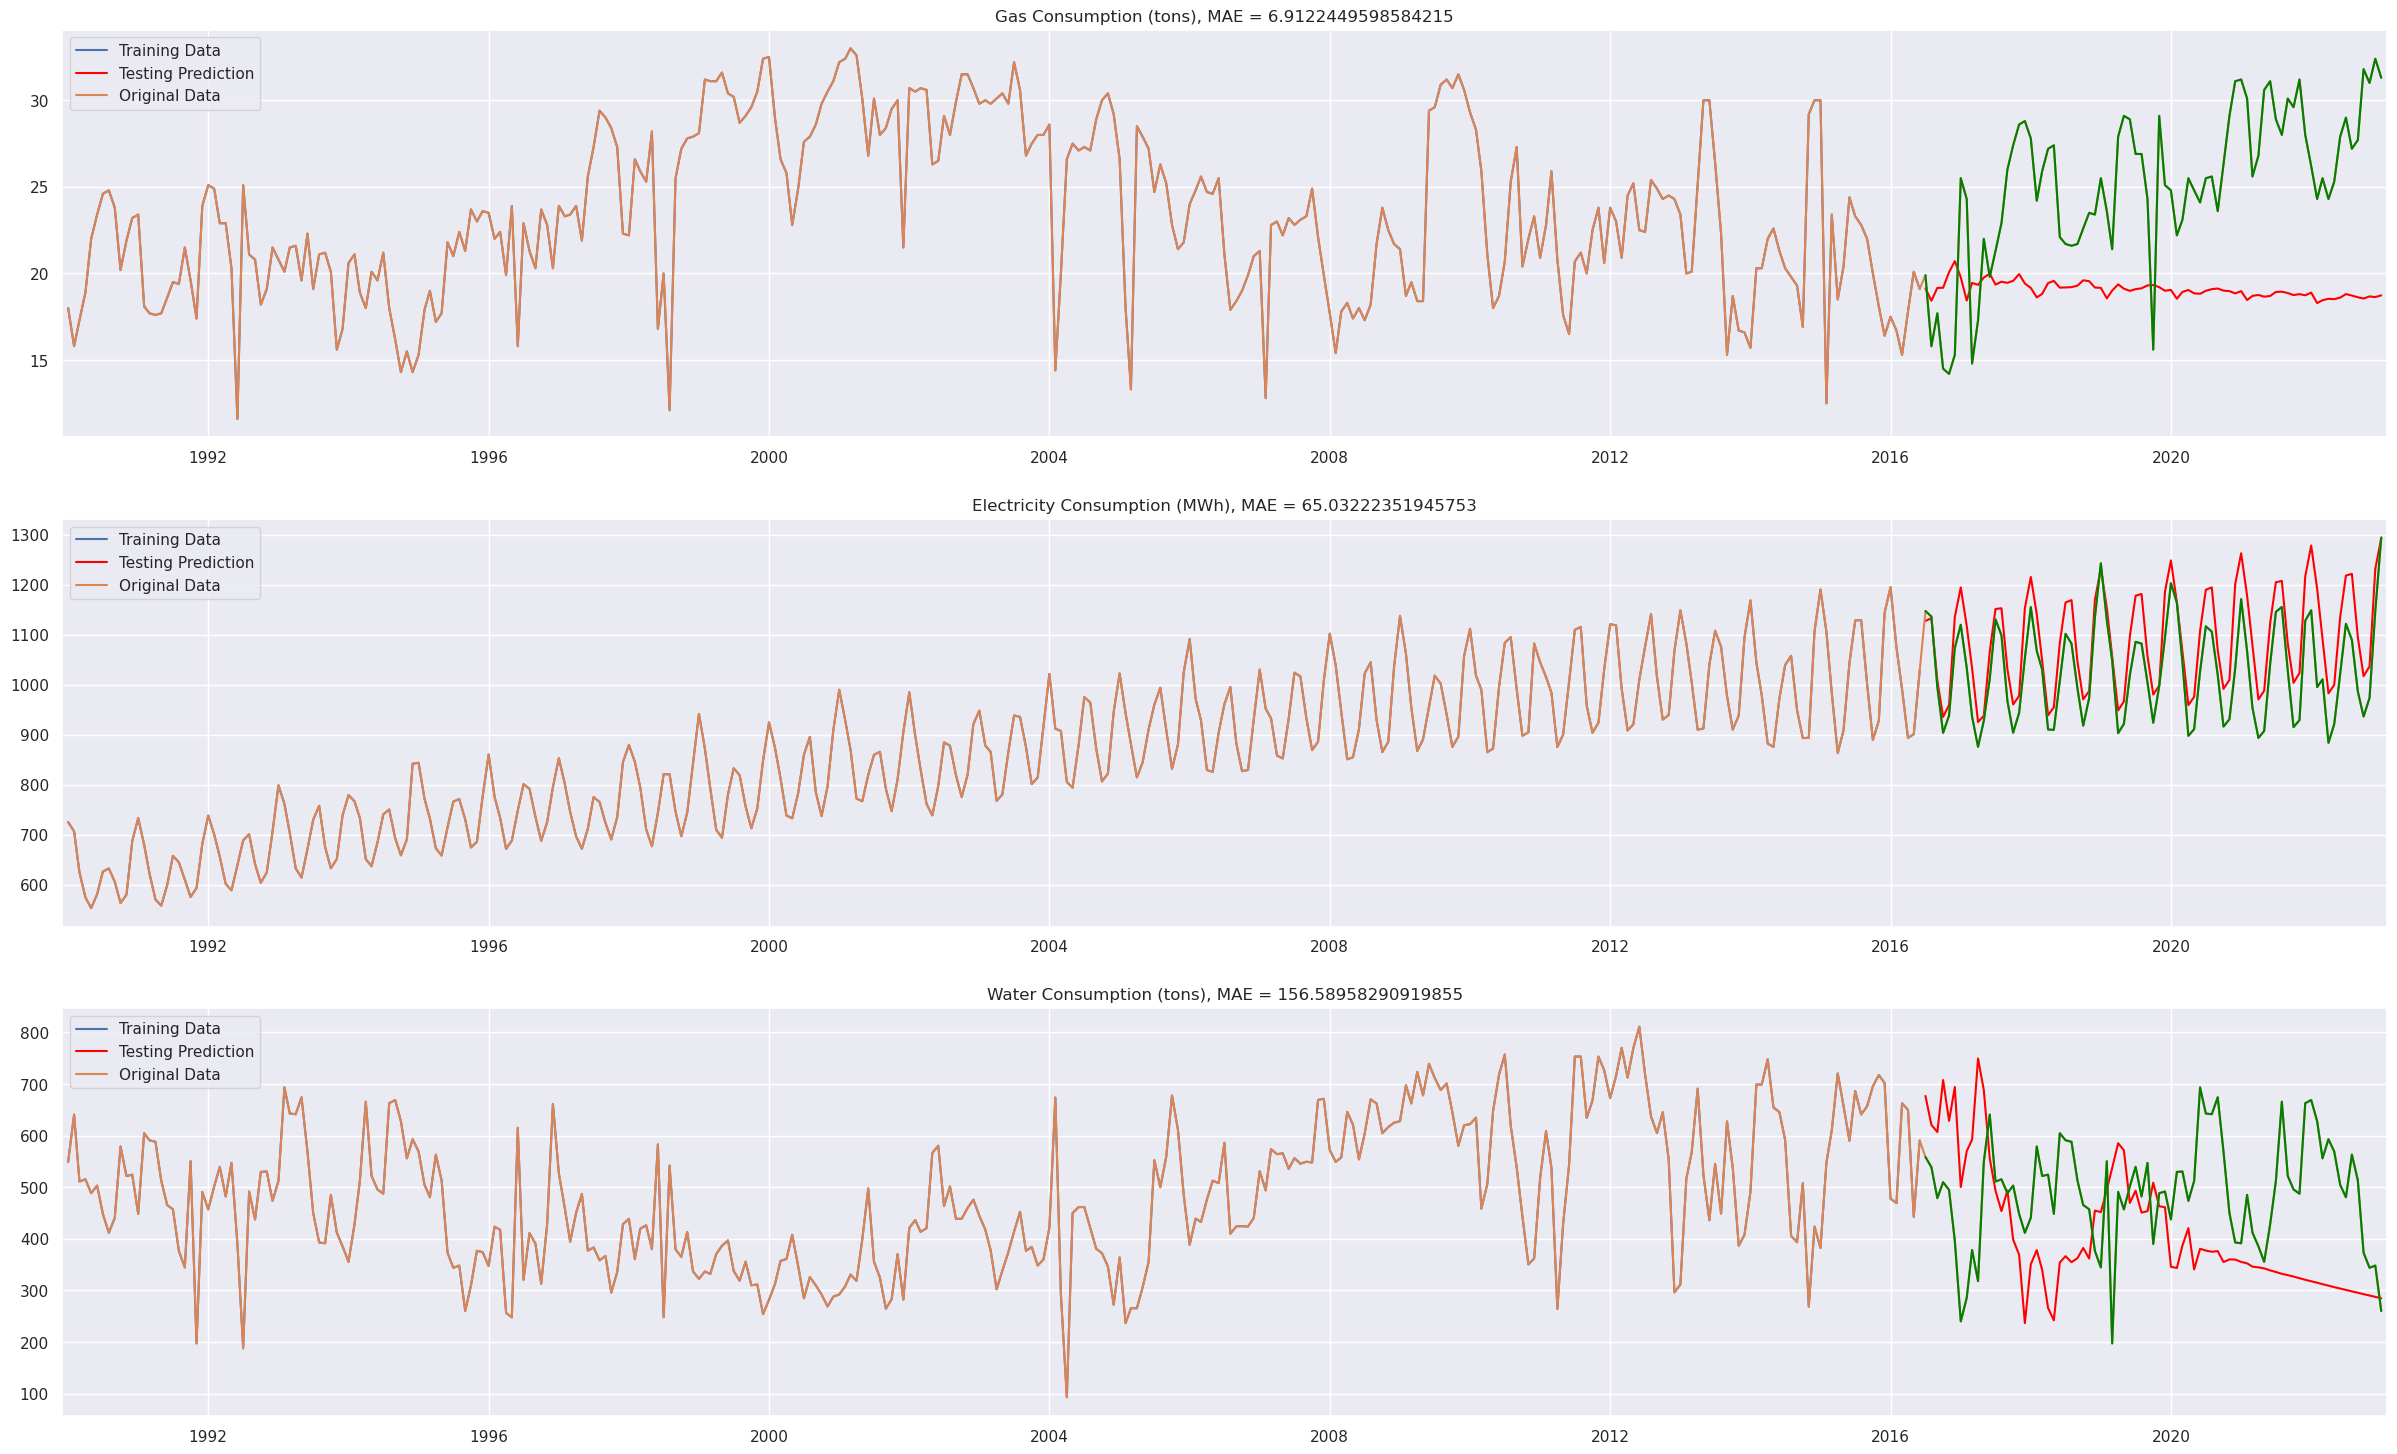

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [ ]:
TunedSARIMAModel1 = SARIMAX(train_data[d_col[0]], order = (7,0,9), seasonal_order = (1,0,3,12), missing = "raise")
TunedSARIMAModel2 = SARIMAX(train_data[d_col[1]], order = (9,1,6), seasonal_order = (2,1,4,12), missing = "raise")
TunedSARIMAModel3 = SARIMAX(train_data[d_col[2]], order = (7,0,2), seasonal_order = (0,0,4,12), missing = "raise")

TunedSARIMAArr = [TunedSARIMAModel1, TunedSARIMAModel2, TunedSARIMAModel3]
TunedSARIMADataArr = [data[d_col[0]], data[d_col[1]], data[d_col[2]]]
TunedSARIMATrainDataArr = [train_data[d_col[0]], train_data[d_col[1]], train_data[d_col[2]]]
TunedSARIMATestDataArr = [test_data[d_col[0]], test_data[d_col[1]], test_data[d_col[2]]]
TunedSARIMATitleArr = d_col
TunedSARIMAModels, TunedSARIMASummaries, TunedSARIMAPerf = all_feat_vis(TunedSARIMADataArr, TunedSARIMAArr, TunedSARIMATitleArr, train_data = TunedSARIMATrainDataArr, test_data = TunedSARIMATestDataArr, diagnostics = False)

The predictions show that the model is still attempting to predict the seasonal trends for Gas Consumption, but has failed, and decided to follow the mean instead. It does a good job of predicting the values for Electricity Consumption. It's predictions seem to follow the general trend, with some values being abit higher or lower than is actually there. It attempts to predict water consumption, but seems to invert the highs and lows, and gives up when as the date progresses. This means that SARIMA might be good at predicting Electricity Consumption, and marginal for Water Consumption.

Evaluating hypertuning results
<hr>

In [ ]:
display(expSmoothPerf)
display(TunedARIMAPerf)
display(TunedSARIMAPerf)

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          6.253612   768.185525   828.378347  0.240160
Electricity Consumption (MWh)  44.548296  2025.735198  2085.928020  0.043777
Water Consumption (tons)       86.140110  2954.496869  3014.689691  0.218718

MAE          AIC          BIC      MAPE
Feature                                                                     
Gas Consumption (tons)          5.074063  1639.414551  1707.131475  0.196623
Electricity Consumption (MWh)  30.040101  3014.632551  3074.774980  0.028559
Water Consumption (tons)       85.955111  3790.812581  3832.195147  0.218125

MAE          AIC          BIC      MAPE
Feature                                                                      
Gas Consumption (tons)           6.912245  1651.112869  1730.115948  0.263887
Electricity Consumption (MWh)   65.032224  2782.180418  2864.027277  0.064082
Water Consumption (tons)       156.589583  3919.231539  3971.900259  0.333677

Frorm this, we can pick the best models for the respective features, and start to forecast. We shall forecast 24 steps, or 2 years into the future. It should be enough time for the utility companies to take action.<br>
<hr>
The models we shall use are: <br>
Gas Consumption - ARIMA(7, 0, 9) <br>
Electricity Consumption - ARIMA(9, 1, 6)<br>
Water Consumption - Holt-Winters Exponential Smoothing<br>

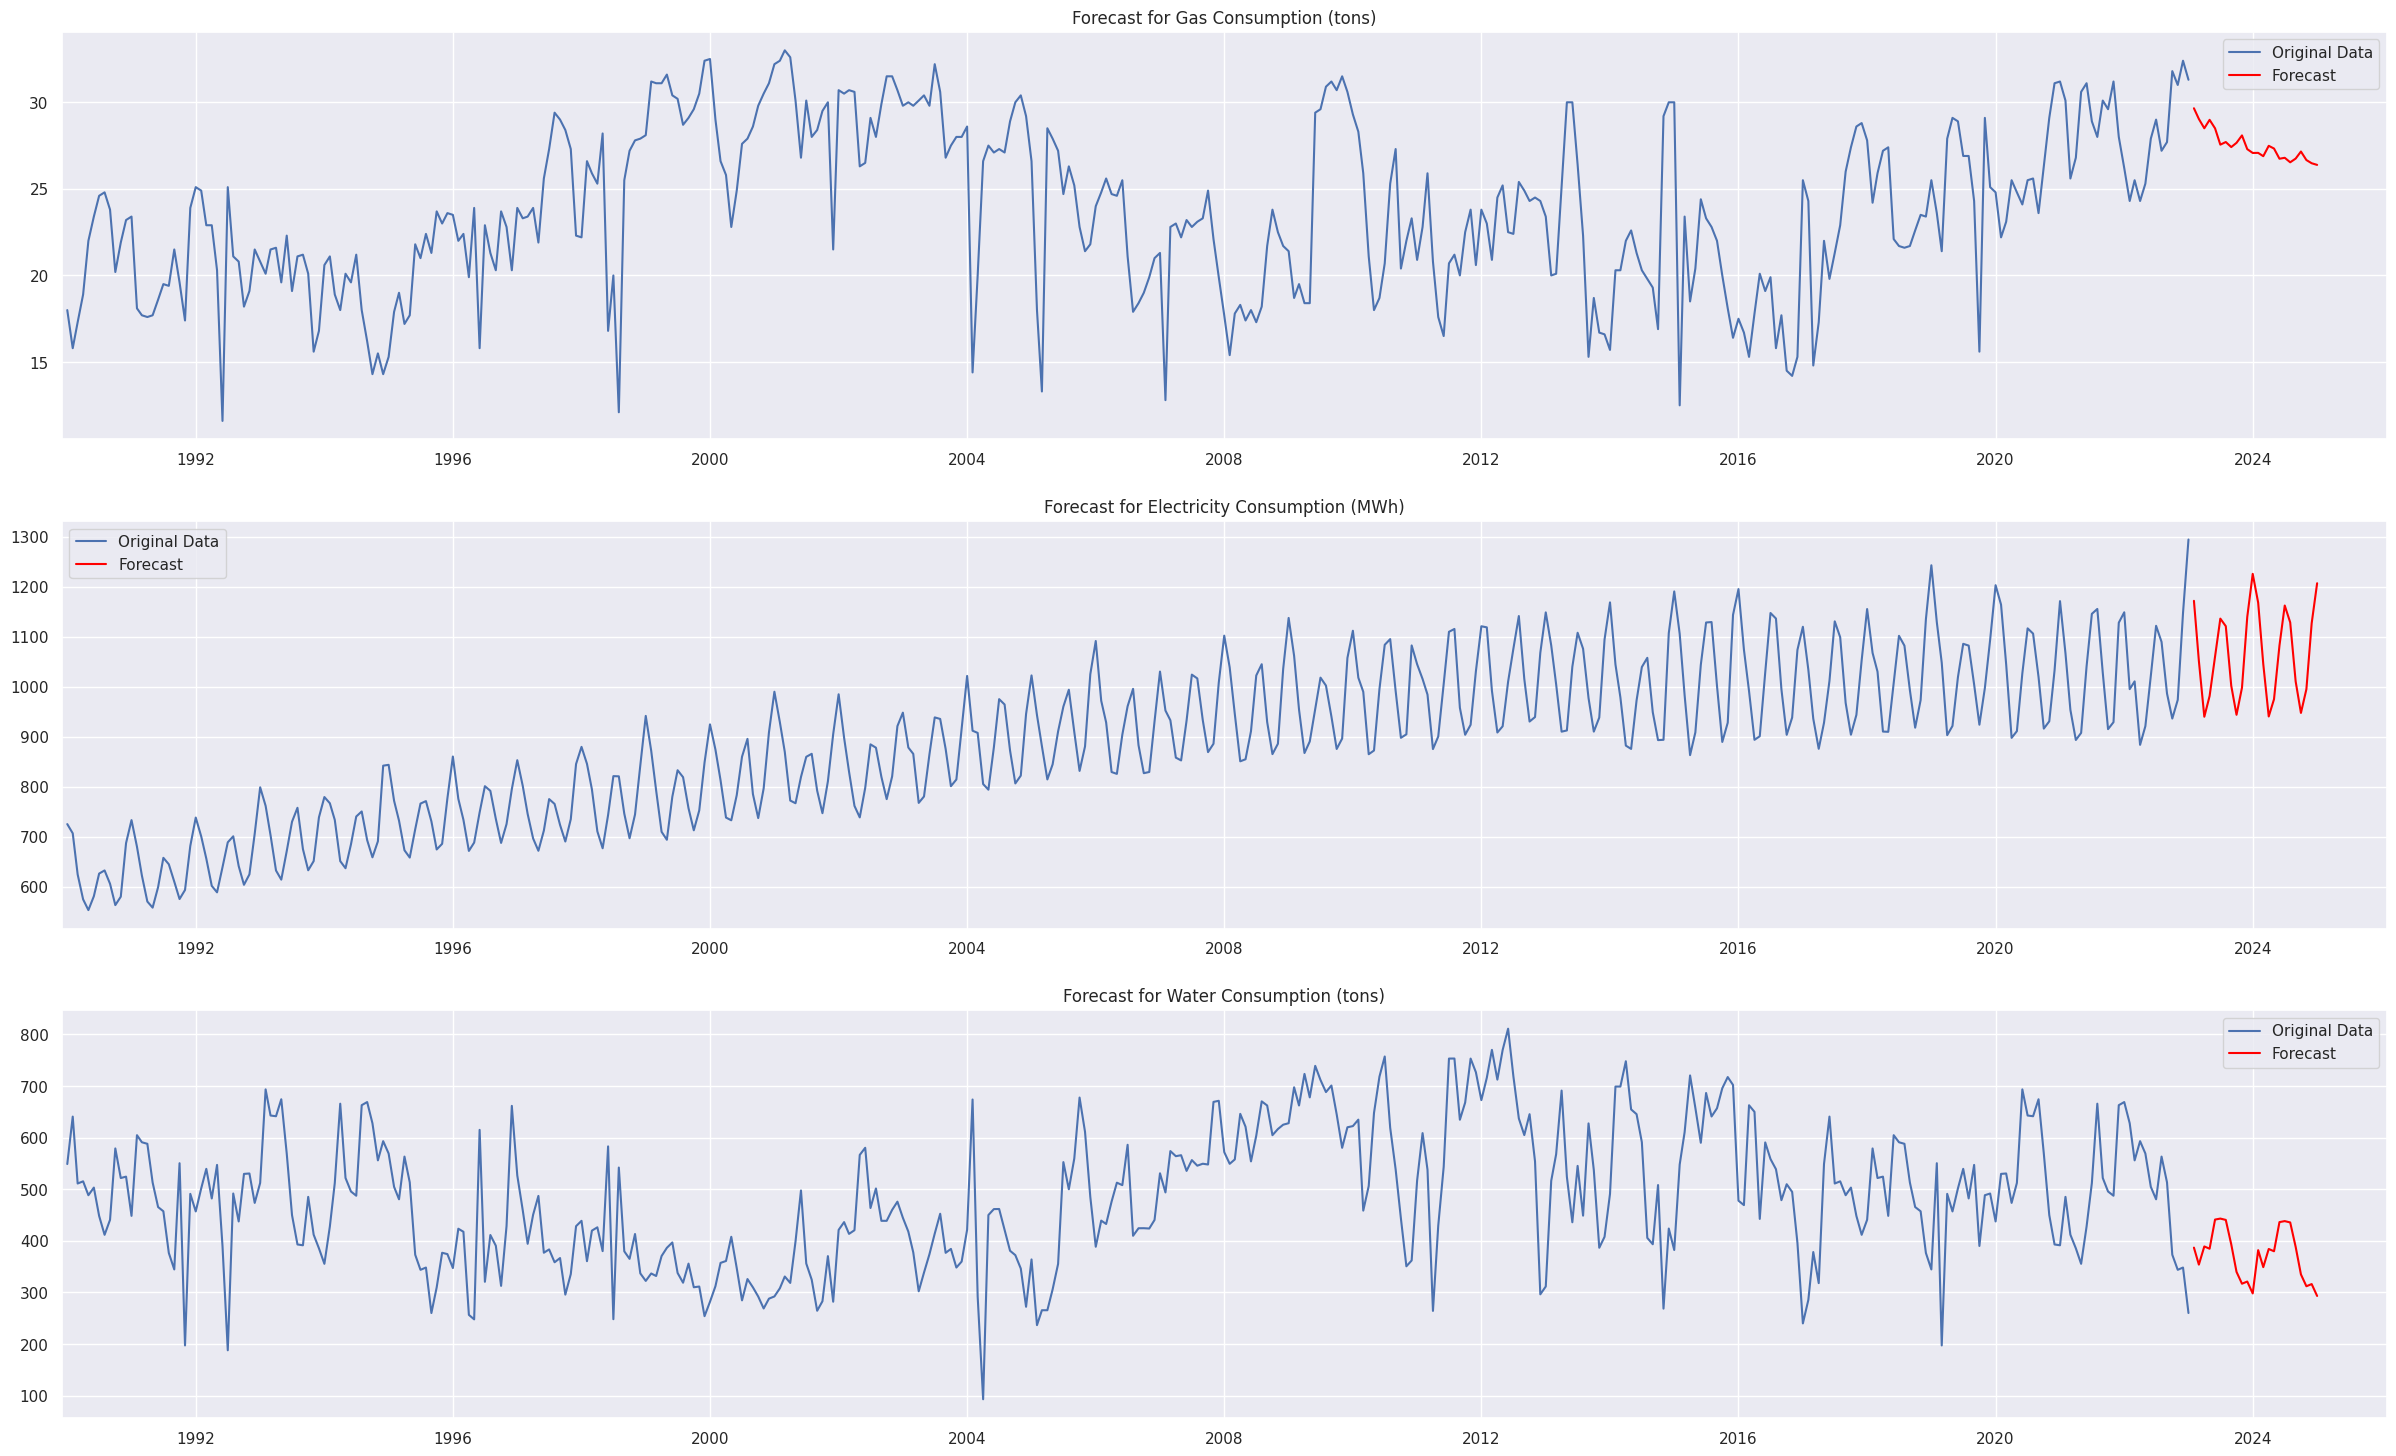

In [ ]:
finalModel1 = ARIMA(data[d_col[0]], order = (7, 0, 9), missing = 'raise').fit()
finalModel2 = ARIMA(data[d_col[1]], order = (9, 1, 6), missing = 'raise').fit()
finalModel3 = ExponentialSmoothing(data[d_col[2]], trend = "add", seasonal = "add", missing = "raise").fit()
fig, [ax0, ax1, ax2] = plt.subplots(3,1, figsize = (30,18))
axes = [ax0, ax1, ax2]
finalModelArr = [finalModel1, finalModel2, finalModel3]

for model, title, ax in zip(finalModelArr, d_col, axes):
    forecast = model.forecast(steps = 24)
    ax.plot(data[title], label = "Original Data")
    ax.plot(forecast, label = "Forecast", color = "red")
    ax.legend()
    ax.set_xlim(np.datetime64('1989-12-01'), np.datetime64('2026-02-01'))
    ax.set_title(f"Forecast for {title}")

plt.show()

From the forecasts, we can see that the models predict the amount of gas consumed to slowly drop, the amount of electricity consumed to maintain on it’s current trend, and for water consumption to increase slightly, but follow it’s pre-existing seasonal trend.

<font size = 5>Conclusions</font>
<hr>
We have created three models to forecast utility usage. These models are able to predict usage with acceptable accuracy. However, there are some limitations to our models. For example, our gas consumption predictions are not very accurate. Additionally, our models are not able to predict sudden spikes in consumption or shifts in consumption that could be caused by external factors. This is because our models do not take into account other exogenous features. Finally, our models are not able to predict very far into the future without new data, or losing accuracy. This means that their usefulness will decrease over time.

Overall, our models are a good starting point. However, we can improve them by providing them with better data that includes exogenous variables and more data with higher fidelity (i.e daily records). We can also improve our predictions by using more advanced models such as neural networks.